In [40]:
# IMPORT

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inLine

# https://www.python-graph-gallery.com/

# Reading Files

In [41]:
# Reading file

df = pd.read_csv(r'C:\Users\RoiAz\Xy_train_SMOKE.csv',low_memory=False)
df = pd.DataFrame(df)
df.isna().sum()

ID                      0
gender                  0
age                     3
height(cm)             43
weight(kg)              4
waist(cm)               4
eyesight(left)          6
eyesight(right)        10
hearing(left)           5
hearing(right)         17
systolic               20
relaxation             13
fasting blood sugar    11
Cholesterol            15
triglyceride           25
HDL                    12
LDL                    11
hemoglobin             15
Urine protein           9
serum creatinine        6
AST                     6
ALT                    22
Gtp                     0
oral                    2
dental caries           0
tartar                  1
smoking                 0
dtype: int64

# Data Fixing : 

In [42]:
# Serum Creatinine

data = df.copy()
for index, row in data.iterrows():
    if data.at[index, 'serum creatinine'] <0.6 : 
        data.at[index, 'serum creatinine'] = "Under normal range"
    elif data.at[index, 'serum creatinine'] >= 0.6  and data.at[index, 'serum creatinine'] <= 1.3: 
        data.at[index, 'serum creatinine'] = "Normal"
    elif data.at[index, 'serum creatinine'] > 1.3  :  # f
        data.at[index, 'serum creatinine'] = "Above normal range"

In [43]:
# Waist (cm) :
        
data = data[data["waist(cm)"].str.contains("ok") == False]
data = data[data["waist(cm)"].str.contains('-33') == False]

In [44]:
# Fasting Blood Sugar

data1 = df.copy()
data1 = data1[df["fasting blood sugar"] < 200]
mean_fasting_blood_sugar = data1["fasting blood sugar"].mean()
for index, row in data.iterrows():
    if (data.at[index, 'fasting blood sugar'] > 200) :  
        data.at[index, 'fasting blood sugar'] = mean_fasting_blood_sugar

In [45]:
# Systolic

data1 = df.copy()
data1 = data1[df.systolic != (-102) | (949) | (-12)]
mean_systolic = data1["systolic"].mean()
for index, row in data.iterrows():
    if (data.at[index, 'systolic'] <70) or (data.at[index, 'systolic'] >240) :  
        data.at[index, 'systolic'] = mean_systolic

In [46]:
# LDL

data1 = df.copy()
data1 = data1[df.LDL <  300 ]
mean_LDL = data1["LDL"].mean()
for index, row in data.iterrows():
    if (data.at[index, 'LDL'] > 300) :
        data.at[index, 'LDL'] = mean_LDL

In [47]:
# HDL

data1 = df.copy()
data1 = data1[df.HDL <  160 ]
mean_HDL = data1["HDL"].mean()
for index, row in data.iterrows():
    if (data.at[index, 'HDL'] > 160) : 
        data.at[index, 'HDL'] = mean_HDL

In [48]:
# AST
data1 = df.copy()
data1 = data1[df.AST <  100 ]
mean_AST = data1["AST"].mean()
for index, row in data.iterrows():
    if (data.at[index, 'AST'] > 100) :
        data.at[index, 'AST'] = mean_AST

In [49]:
# Age
for index, row in data.iterrows():
    if data.at[index, 'age'] <= 30 :  
        data.at[index, 'age'] = "20-30"
    elif (data.at[index, 'age'] > 30) and (data.at[index, 'age'] <= 40):
        data.at[index, 'age'] = "30-40"
    elif (data.at[index, 'age'] > 40) and (data.at[index, 'age'] <= 55):
        data.at[index, 'age'] = "40-55"
    elif (data.at[index, 'age'] > 55) and (data.at[index, 'age'] <= 70):
        data.at[index, 'age'] = "55-70"
    else:
        data.at[index, 'age'] = "70+"


In [50]:
# Weight:
for index, row in data.iterrows():
    if data.at[index, 'weight(kg)'] >=100 :  
        data.at[index, 'weight(kg)'] = "Above 100"
    elif data.at[index, 'weight(kg)'] <= 40  :  
        data.at[index, 'weight(kg)'] = "Under 40"
    elif data.at[index, 'weight(kg)'] > 40 and data.at[index, 'weight(kg)'] < 55 : 
        data.at[index, 'weight(kg)'] = "41-54"
    elif data.at[index, 'weight(kg)'] >= 55 and data.at[index, 'weight(kg)'] <= 70 : 
        data.at[index, 'weight(kg)'] = "55-70"
    elif data.at[index, 'weight(kg)'] > 70 and data.at[index, 'weight(kg)'] < 100 : 
        data.at[index, 'weight(kg)'] = "71-100"

In [51]:
# Eyesight(left) :
data1 = df.copy()
data1 = data1 [df["eyesight(left)"] != 9.9]
mean_eye_sight_left = data1["eyesight(left)"].mean()
for index, row in data.iterrows():
    if data.at[index, 'eyesight(left)'] > 2 : 
        data.at[index, 'eyesight(left)'] = mean_eye_sight_left
        
# Eyesight(Right) :        
data1 = df.copy()
data1= data1[df["eyesight(right)"] !=9.9]
mean_eye_sight_right = data1["eyesight(right)"].mean()
for index, row in data.iterrows():
    if data.at[index, 'eyesight(right)'] > 2 : 
        data.at[index, 'eyesight(right)'] = mean_eye_sight_right

In [52]:
# Hearing(Left)
for index, row in data.iterrows():
    if data.at[index, 'hearing(left)'] == 1 :  
        data.at[index, 'hearing(left)'] = "Normal"
    if data.at[index, 'hearing(left)'] == 2 :  
        data.at[index, 'hearing(left)'] = "Impairment"
        
# Hearing(Right)
for index, row in data.iterrows():
    if data.at[index, 'hearing(right)'] == 1 :  
        data.at[index, 'hearing(right)'] = "Normal"
    if data.at[index, 'hearing(right)'] == 2 :  
        data.at[index, 'hearing(right)'] = "Impairment"

In [53]:
# Dental Caries

for index, row in data.iterrows():
    if data.at[index, 'dental caries'] == 1 :  
        data.at[index, 'dental caries'] = "Yes"
    if data.at[index, 'dental caries'] == 0 :  
        data.at[index, 'dental caries'] = "No"
    

In [54]:
# Oral

for index, row in data.iterrows():
    if (data.at[index, 'oral'] == "yes") or (data.at[index, 'oral'] == "12") or (data.at[index, 'oral'] == "Y"):  
        data.at[index, 'oral'] = 'Yes'

In [55]:
# Tartar

for index, row in data.iterrows():
    if data.at[index, 'tartar'] == 'Y' :  
        data.at[index, 'tartar'] = "Yes"
    if data.at[index, 'tartar'] == "N" :  
        data.at[index, 'tartar'] = "No"
    

In [56]:
# Smoking

for index, row in data.iterrows():
    if data.at[index, 'smoking'] == 1 :  
        data.at[index, 'smoking'] = "Yes"
    if data.at[index, 'smoking'] == 0 :  
        data.at[index, 'smoking'] = "No"

C:\Users\RoiAz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'ID'), Text(0, 0.5, 'Density')]

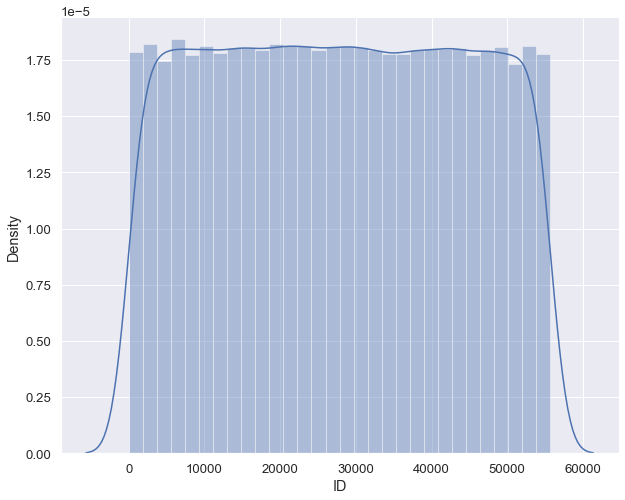

In [39]:
f, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.3)
sns.despine(f)
sns.distplot(df['ID'], bins = 30).set(xlabel='ID', ylabel='Density')

# Gender

[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'Count')]

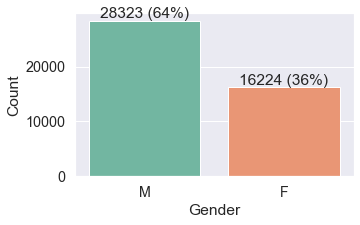

In [19]:
# Gender :

plt.rcParams["figure.figsize"] = 5, 3
sns.set(font_scale=1.3)
Gender_Plot = sns.countplot(x=data['gender'], palette="Set2", order=data['gender'].value_counts(ascending=False).index)
rel_values = data['gender'].value_counts(ascending=False, normalize=True).values * 100
orderLabel = data['gender'].value_counts(ascending=False).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
Gender_Plot.bar_label(container = Gender_Plot.containers[0],labels=lbls)
Gender_Plot.set(xlabel='Gender', ylabel='Count')
#plt.show()

# Age

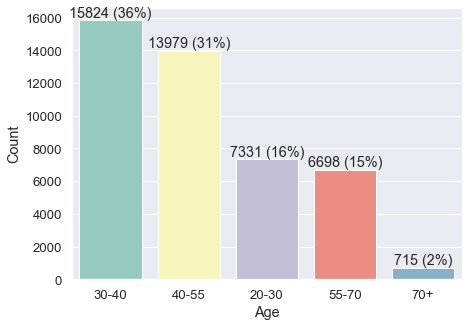

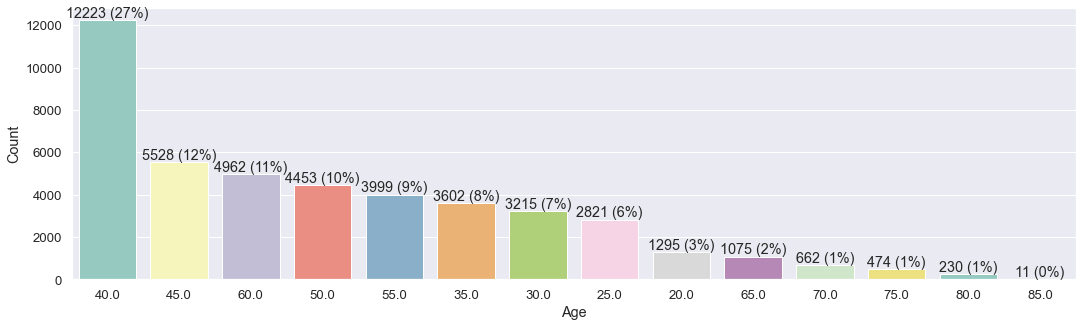

C:\Users\RoiAz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Density')]

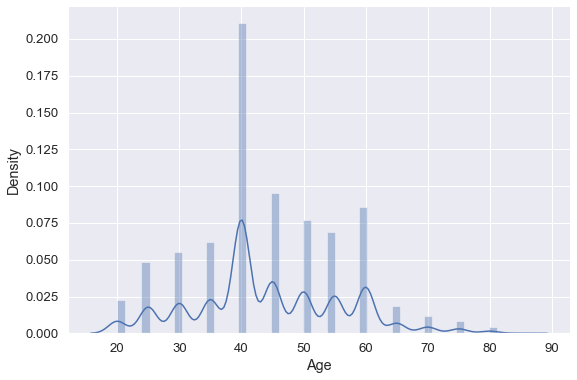

In [34]:
# Age
plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
Age_Plot= sns.countplot(x=data['age'],palette="Set3",order=data['age'].value_counts().index)
rel_values = data['age'].value_counts(ascending=False, normalize=True).values * 100
orderLabel = data['age'].value_counts(ascending=False).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
Age_Plot.bar_label(container=Age_Plot.containers[0],labels=lbls)
Age_Plot.set(xlabel='Age', ylabel='Count')
plt.show()

# Age : (normal)
plt.rcParams["figure.figsize"]=18,5
sns.set(font_scale=1.2)
Age_Plot_N= sns.countplot(x=df['age'],palette="Set3",order=df['age'].value_counts().index)
rel_values = df['age'].value_counts(ascending=False, normalize=True).values * 100
orderLabel = df['age'].value_counts(ascending=False).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
Age_Plot_N.bar_label(container=Age_Plot_N.containers[0],labels=lbls)
Age_Plot_N.set(xlabel='Age', ylabel='Count')
plt.show()

f, ax = plt.subplots(figsize=(9, 6))
sns.despine(f)
sns.distplot(df['age']).set(xlabel='Age', ylabel='Density')

# Height (cm)

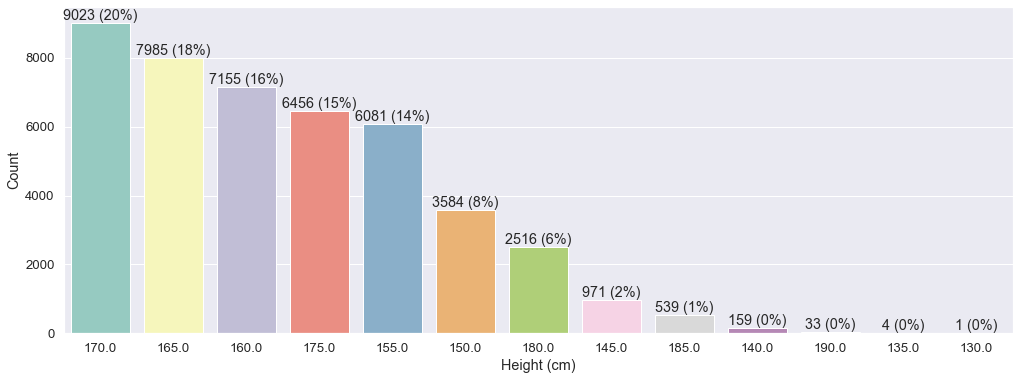

C:\Users\RoiAz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Height (cm)'), Text(0, 0.5, 'Density')]

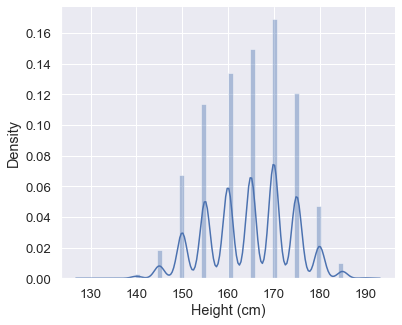

In [21]:
# Height (cm) :

plt.rcParams["figure.figsize"]=17,6
sns.set(font_scale=1.2)
Hight_Plot= sns.countplot(x=data['height(cm)'],palette="Set3",order=data['height(cm)'].value_counts(ascending=False).index)
rel_values = data['height(cm)'].value_counts(ascending=False, normalize=True).values * 100
orderLabel = data['height(cm)'].value_counts(ascending=False).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
Hight_Plot.bar_label(container = Hight_Plot.containers[0],labels=lbls)
Hight_Plot.set(xlabel='Height (cm)', ylabel='Count')
plt.show()

f, ax = plt.subplots(figsize=(6, 5))
sns.despine(f)
sns.distplot(df['height(cm)']).set(xlabel='Height (cm)', ylabel='Density')

# Weight (kg)

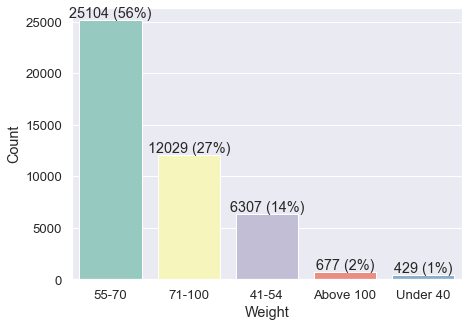

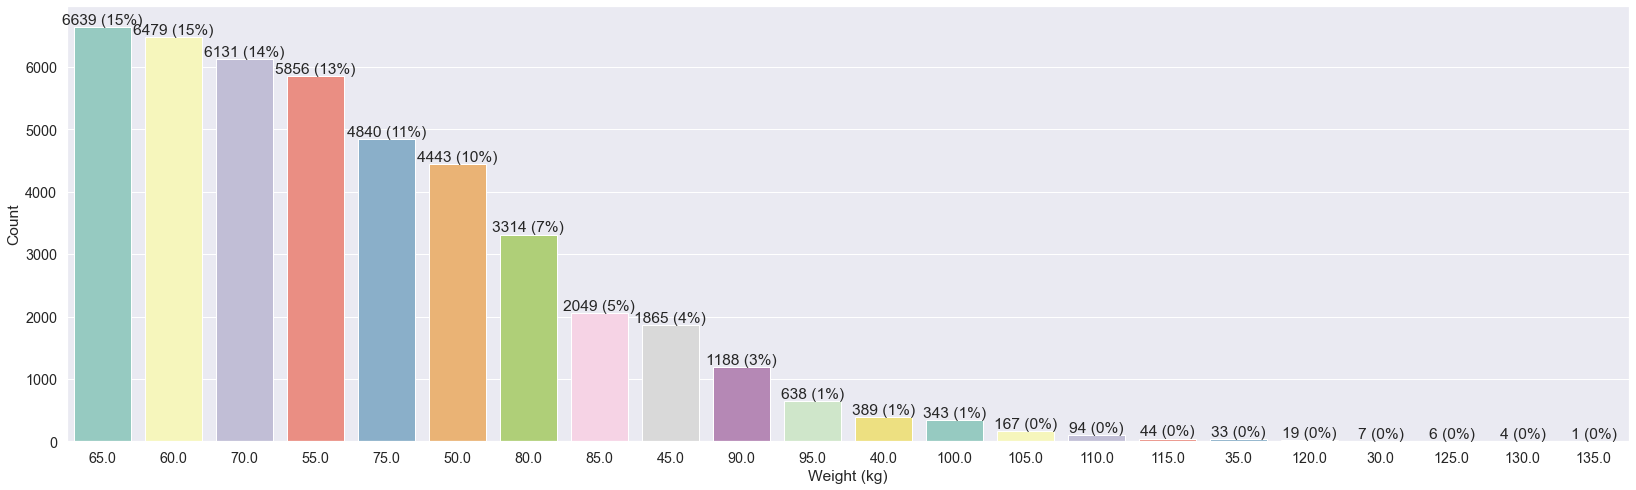

C:\Users\RoiAz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Weight (kg)'), Text(0, 0.5, 'Density')]

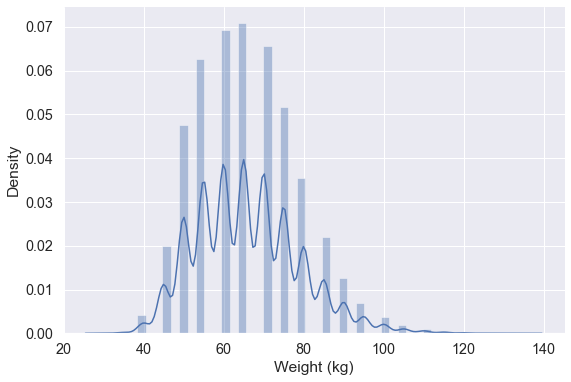

In [22]:
# Weight (kg) :

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
Weight_Plot= sns.countplot(x=data['weight(kg)'],palette="Set3",order=data['weight(kg)'].value_counts(ascending=False).index)
rel_values = data['weight(kg)'].value_counts(ascending=False, normalize=True).values * 100
orderLabel = data['weight(kg)'].value_counts(ascending=False).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
Weight_Plot.bar_label(container=Weight_Plot.containers[0],labels=lbls)
Weight_Plot.set(xlabel='Weight', ylabel='Count')
plt.show()

# Weight (kg)  - (Normal):

plt.rcParams["figure.figsize"]=28,8
sns.set(font_scale=1.3)
Weight_Plot_N= sns.countplot(x=df['weight(kg)'],palette="Set3",order=df['weight(kg)'].value_counts(ascending=False).index)
rel_values = df['weight(kg)'].value_counts(ascending=False, normalize=True).values * 100
orderLabel = df['weight(kg)'].value_counts(ascending=False).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
Weight_Plot_N.bar_label(container=Weight_Plot_N.containers[0],labels=lbls)
Weight_Plot_N.set(xlabel='Weight (kg)', ylabel='Count')
plt.show()

f, ax = plt.subplots(figsize=(9, 6))
sns.despine(f)
sns.distplot(df['weight(kg)']).set(xlabel='Weight (kg)', ylabel='Density')

# Waist (cm)

C:\Users\RoiAz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Waist (cm)')]

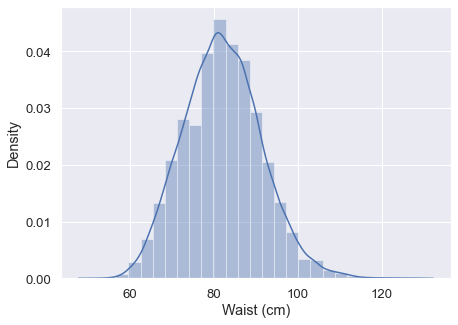

In [23]:
# Waist (cm) :

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
sns.distplot( a=data['waist(cm)'], bins = 27).set(xlabel='Waist (cm)')





# Eyesight (Left) :



C:\Users\RoiAz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 0.9985540778297212 , Median:  1.0 , STD:  0.3268495620029954


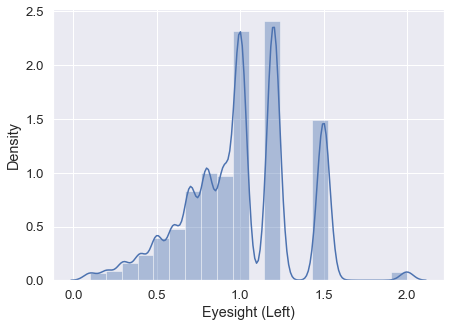

In [24]:
# Eyesight(left) :

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
sns.distplot( a=data['eyesight(left)'],bins=20).set(xlabel = "Eyesight (Left)")

print("Avg:",data["eyesight(left)"].mean(),", Median: ",data["eyesight(left)"].median(),", STD: ",data["eyesight(left)"].std())

# Eyesight (Right) :

C:\Users\RoiAz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 0.9939296445678784 , Median:  1.0 , STD:  0.3249232988517556


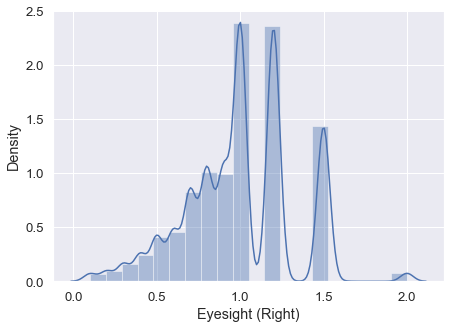

In [25]:
# Eyesight(Right) :

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
sns.distplot( a=data['eyesight(right)'],bins=20).set(xlabel = "Eyesight (Right)")

print("Avg:",data["eyesight(right)"].mean(),", Median: ",data["eyesight(right)"].median(),", STD: ",data["eyesight(right)"].std())

In [26]:
#data['eyesight(right)'].describe() , data['eyesight(left)'].describe()

# Hearing (Left)

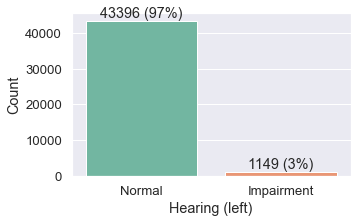

In [27]:
# Hearing(left)

plt.rcParams["figure.figsize"]=5,3
sns.set(font_scale=1.2)

hearingLeft_Plot= sns.countplot(x=data['hearing(left)'],palette="Set2",order=data['hearing(left)'].value_counts(ascending=False).index)
rel_values = data['hearing(left)'].value_counts(ascending=False, normalize=True).values * 100
orderLabel = data['hearing(left)'].value_counts(ascending=False).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
hearingLeft_Plot.bar_label(container=hearingLeft_Plot.containers[0],labels=lbls)
hearingLeft_Plot.set(xlabel = "Hearing (left)", ylabel = "Count")
plt.show()

# Hearing (Right)

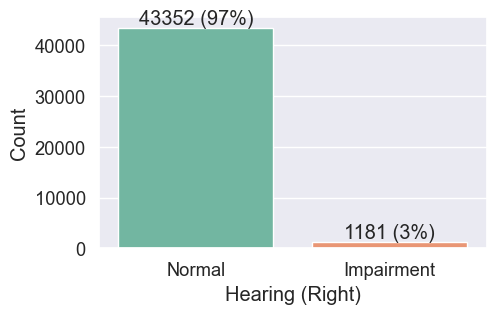

In [31]:
# Hearing(Right)

plt.rcParams["figure.figsize"]=5,3
sns.set(font_scale=1.2)

hasYardPlot= sns.countplot(x=data['hearing(right)'],palette="Set2",order=data['hearing(right)'].value_counts(ascending=False).index)
rel_values = data['hearing(right)'].value_counts(ascending=False, normalize=True).values * 100
orderLabel = data['hearing(right)'].value_counts(ascending=False).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
hasYardPlot.bar_label(container=hasYardPlot.containers[0],labels=lbls)
hasYardPlot.set(xlabel = "Hearing (Right)", ylabel = "Count")
plt.show()

# Systolic

C:\Users\Lital\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 121.51067960669099 , Median:  120.0 , STD:  13.668427263187013


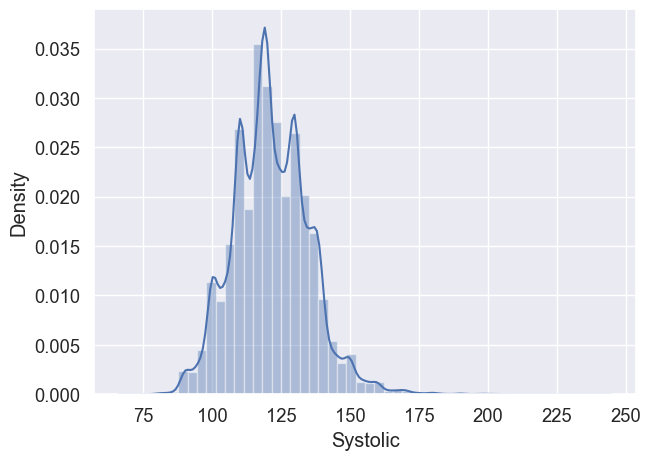

In [32]:
# Systolic

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
sns.distplot( a=data['systolic']).set(xlabel = "Systolic")

#df['systolic'].describe() , data['systolic'].describe()
print("Avg:",data["systolic"].mean(),", Median: ",data["systolic"].median(),", STD: ",data["systolic"].std())

# Relaxation

C:\Users\Lital\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 76.00767900846488 , Median:  76.0 , STD:  9.680463082781525


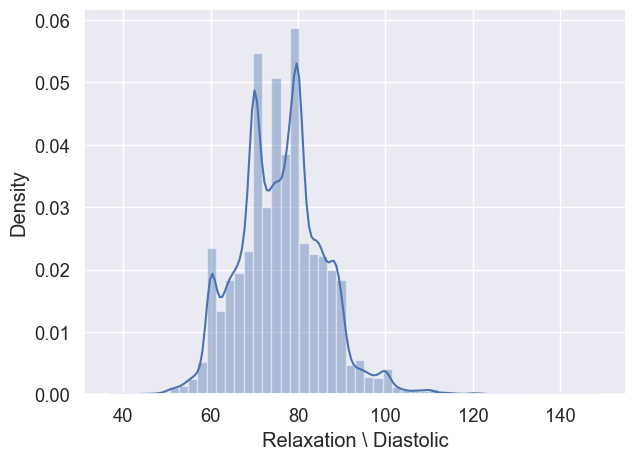

In [33]:
# Relaxation

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
sns.distplot( a=df['relaxation']).set(xlabel = "Relaxation \ Diastolic")
print("Avg:",data["relaxation"].mean(),", Median: ",data["relaxation"].median(),", STD: ",data["relaxation"].std())

# Fasting Blood Sugar

C:\Users\Lital\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 98.14947593523468 , Median:  96.0 , STD:  15.683155834960115


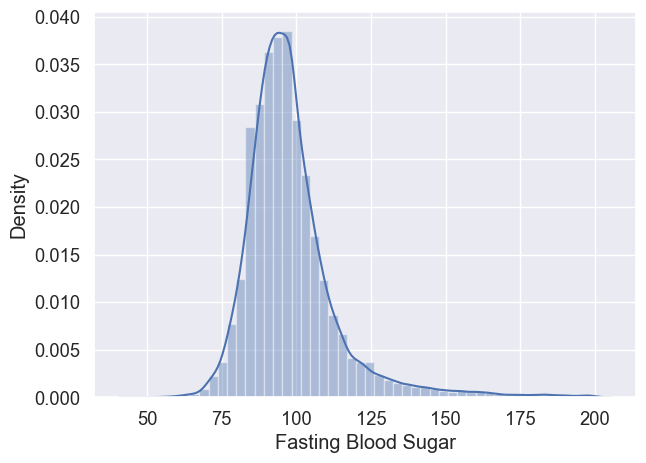

In [34]:
# Fasting Blood Sugar
       
plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
sns.distplot( a=data['fasting blood sugar']).set(xlabel = "Fasting Blood Sugar")
print("Avg:",data["fasting blood sugar"].mean(),", Median: ",data["fasting blood sugar"].median(),", STD: ",data["fasting blood sugar"].std())

# Cholesterol


C:\Users\Lital\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 196.7463792522735 , Median:  195.0 , STD:  36.16253308918495


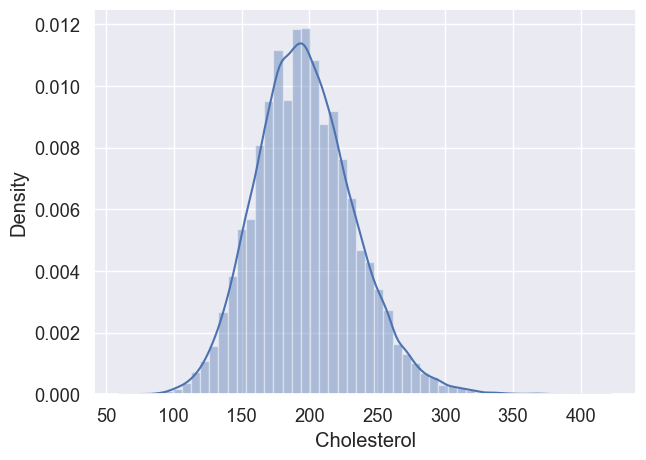

In [35]:
# Cholesterol

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
sns.distplot( a=df['Cholesterol'])
print("Avg:",data["Cholesterol"].mean(),", Median: ",data["Cholesterol"].median(),", STD: ",data["Cholesterol"].std())

# Triglyceride

C:\Users\Lital\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 126.48668860560115 , Median:  108.0 , STD:  71.44882684935287


count    44525.000000
mean       126.486689
std         71.448827
min         11.000000
25%         74.000000
50%        108.000000
75%        160.000000
max        405.000000
Name: triglyceride, dtype: float64

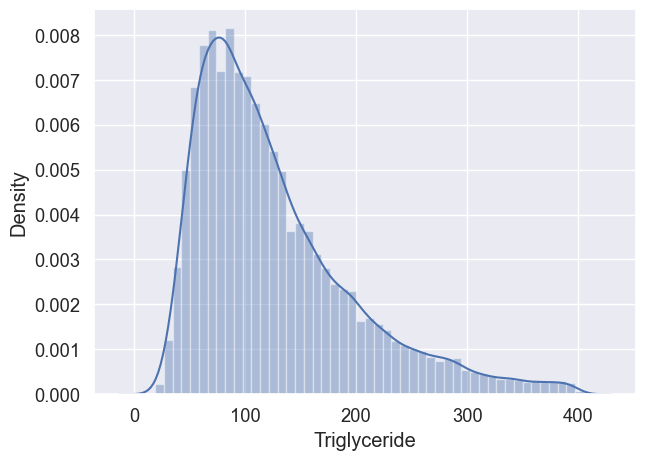

In [36]:
# Triglyceride

#df = pd.DataFrame(df)
#data = df.copy()
data1 = df.copy()
data1 = data1[df.triglyceride != (-35) | (999) ]
mean_triglyceride = data1["triglyceride"].mean()
for index, row in data.iterrows():
    if (data.at[index, 'triglyceride'] <0) or (data.at[index, 'triglyceride'] > 405 ) : 
        data.at[index, 'triglyceride'] = mean_triglyceride

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)

sns.distplot( a=data['triglyceride']).set(xlabel = "Triglyceride")
print("Avg:",data["triglyceride"].mean(),", Median: ",data["triglyceride"].median(),", STD: ",data["triglyceride"].std())
data['triglyceride'].describe()

# HDL

C:\Users\Lital\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 57.26246180666636 , Median:  55.0 , STD:  14.469878919874905


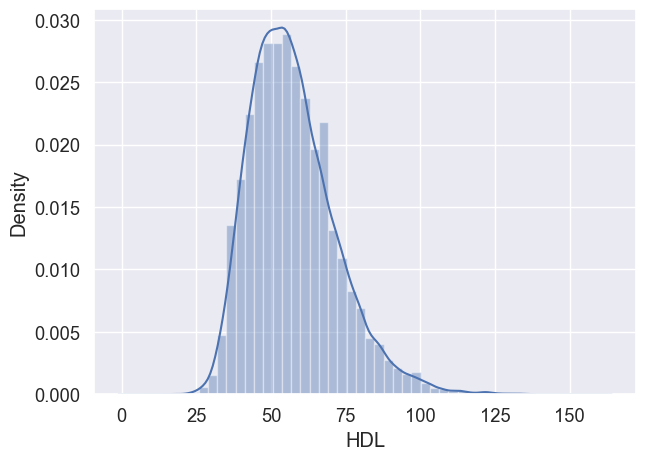

In [37]:
# HDL

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
sns.distplot( a=data['HDL'])
print("Avg:",data["HDL"].mean(),", Median: ",data["HDL"].median(),", STD: ",data["HDL"].std())

# LDL

C:\Users\Lital\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 114.3622291242109 , Median:  113.0 , STD:  33.28651525486464


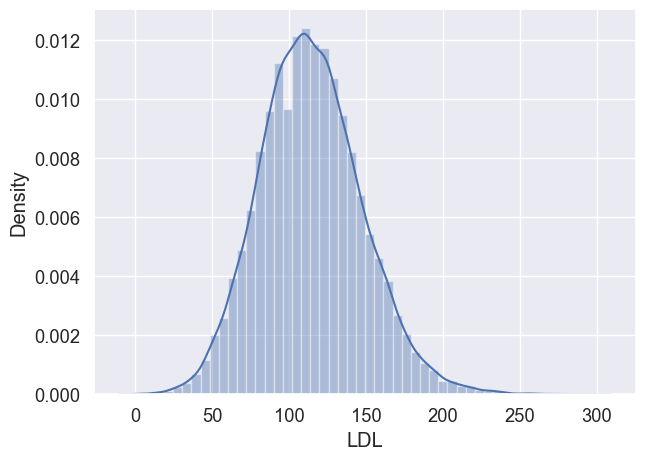

In [38]:
# LDL

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)

sns.distplot( a=data['LDL'])
print("Avg:",data["LDL"].mean(),", Median: ",data["LDL"].median(),", STD: ",data["LDL"].std())

# Hemoglobin

C:\Users\Lital\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 14.620049399348671 , Median:  14.8 , STD:  1.5684124278085456


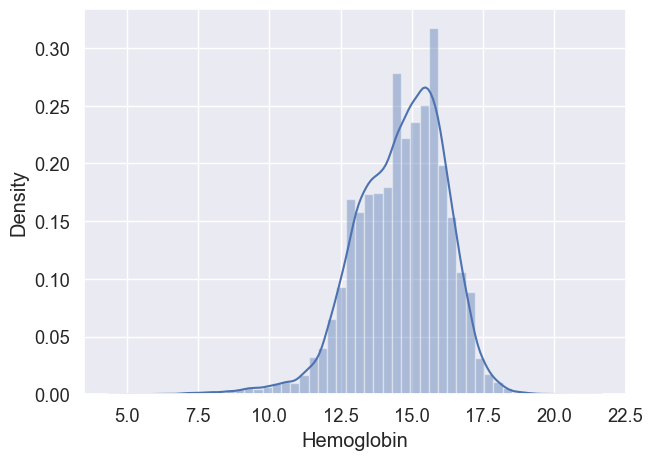

In [39]:
# Hemoglobin

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
sns.distplot( a=df['hemoglobin']).set(xlabel='Hemoglobin')
print("Avg:",data["hemoglobin"].mean(),", Median: ",data["hemoglobin"].median(),", STD: ",data["hemoglobin"].std())

# Urine protein

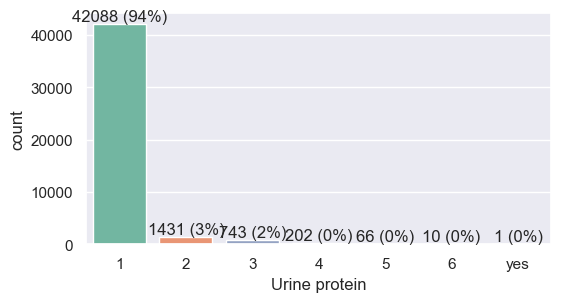

In [40]:
# Urine protein

plt.rcParams["figure.figsize"]=6,3
sns.set(font_scale=1.0)

hasYardPlot= sns.countplot(x=data['Urine protein'],palette="Set2",order=data['Urine protein'].value_counts(ascending=False).index)
rel_values = data['Urine protein'].value_counts(ascending=False, normalize=True).values * 100
orderLabel = data['Urine protein'].value_counts(ascending=False).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
hasYardPlot.bar_label(container=hasYardPlot.containers[0],labels=lbls)
plt.show()

# Serum Creatinine

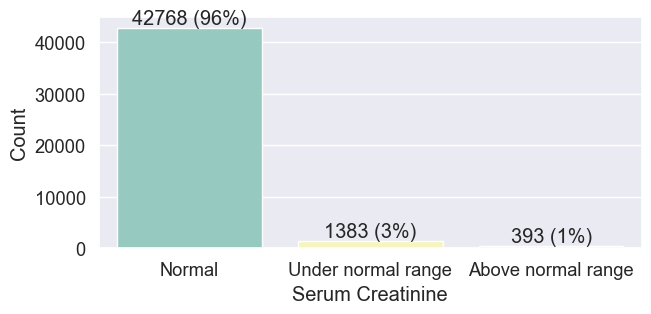

In [41]:
# Serum Creatinine

plt.rcParams["figure.figsize"]=7,3
sns.set(font_scale=1.2)


isNewBuiltPlot= sns.countplot(x=data['serum creatinine'],palette="Set3",order=data['serum creatinine'].value_counts(ascending=False).index)
rel_values = data['serum creatinine'].value_counts(ascending=False, normalize=True).values * 100
orderLabel = data['serum creatinine'].value_counts(ascending=False).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
isNewBuiltPlot.bar_label(container=isNewBuiltPlot.containers[0],labels=lbls)
isNewBuiltPlot.set(xlabel='Serum Creatinine', ylabel="Count")
plt.show()

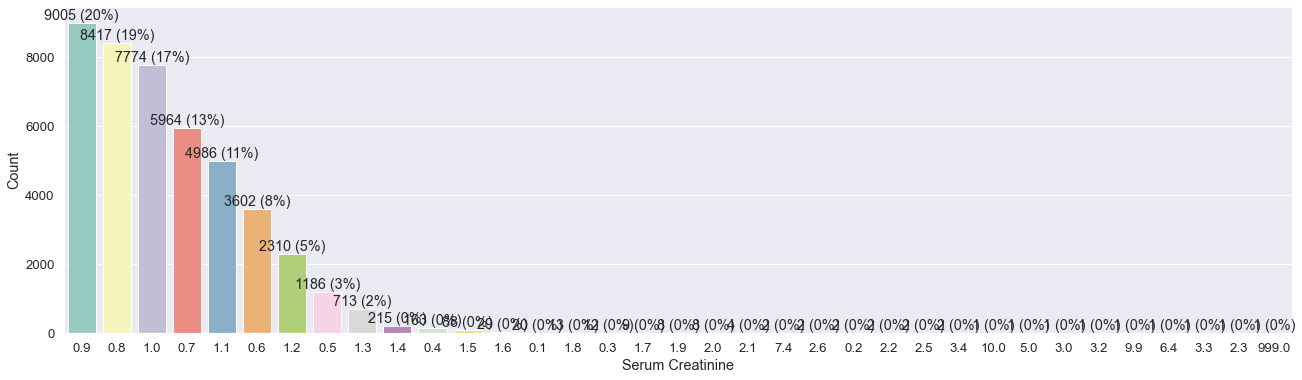

C:\Users\RoiAz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Serum Creatinine'), Text(0, 0.5, 'Density')]

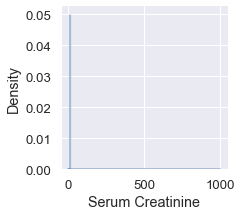

In [61]:
plt.rcParams["figure.figsize"]=22,6
sns.set(font_scale=1.2)


isNewBuiltPlot= sns.countplot(x=df['serum creatinine'],palette="Set3",order=df['serum creatinine'].value_counts(ascending=False).index)
rel_values = df['serum creatinine'].value_counts(ascending=False, normalize=True).values * 100
orderLabel = df['serum creatinine'].value_counts(ascending=False).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
isNewBuiltPlot.bar_label(container=isNewBuiltPlot.containers[0],labels=lbls)
isNewBuiltPlot.set(xlabel='Serum Creatinine', ylabel="Count")
plt.show()

f, ax = plt.subplots(figsize=(3, 3))
sns.despine(f)
sns.distplot(df['serum creatinine']).set(xlabel='Serum Creatinine', ylabel='Density')


# AST

C:\Users\Lital\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 25.309449905404808 , Median:  23.0 , STD:  10.2236544427601


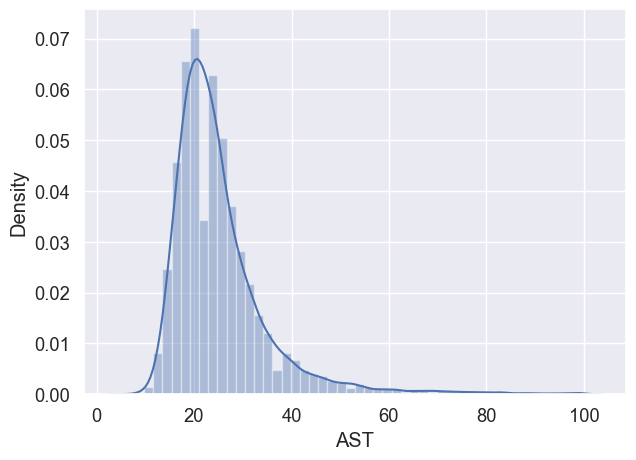

In [43]:
# AST

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)

sns.distplot( a=data['AST'])
data['AST'].describe()
print("Avg:",data["AST"].mean(),", Median: ",data["AST"].median(),", STD: ",data["AST"].std())

# ALT

C:\Users\Lital\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 25.1697045513578 , Median:  21.0 , STD:  14.979941823497292


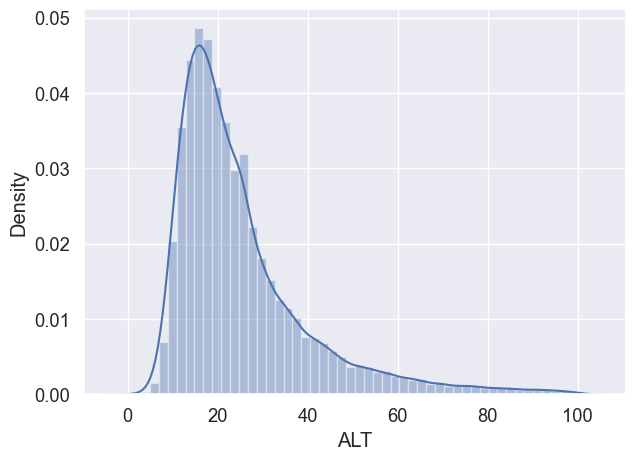

In [44]:
# ALT

data1 = df.copy()
data1 = data1[df.ALT <  100 ]
mean_ALT = data1["ALT"].mean()
for index, row in data.iterrows():
    if (data.at[index, 'ALT'] > 100) :  # fix ages
        data.at[index, 'ALT'] = mean_ALT

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)
sns.distplot( a=data['ALT'])
data['ALT'].describe() , data['AST'].describe()
print("Avg:",data["ALT"].mean(),", Median: ",data["ALT"].median(),", STD: ",data["ALT"].std())

# GTP

C:\Users\Lital\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg: 33.85897085657691 , Median:  25.0 , STD:  25.24232485714303


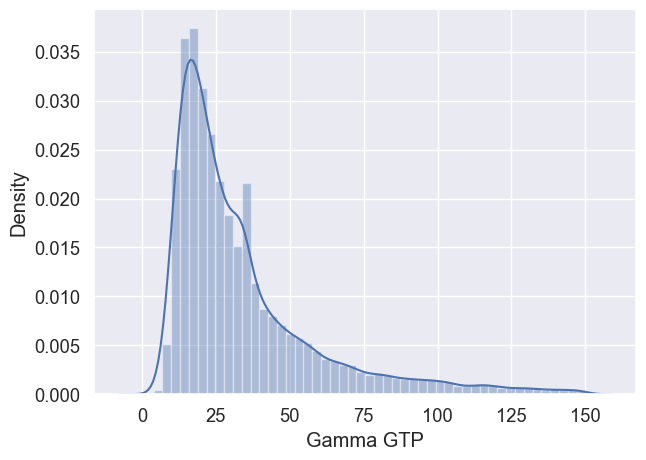

In [45]:
# GTP

data1 = df.copy()
data1 = data1[df.Gtp <  150 ]
mean_Gtp = data1["Gtp"].mean()
for index, row in data.iterrows():
    if (data.at[index, 'Gtp'] > 150) :  # fix ages
        data.at[index, 'Gtp'] = mean_Gtp

plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)

sns.distplot( a=data['Gtp']).set(xlabel='Gamma GTP')
print("Avg:",data["Gtp"].mean(),", Median: ",data["Gtp"].median(),", STD: ",data["Gtp"].std())

# Oral

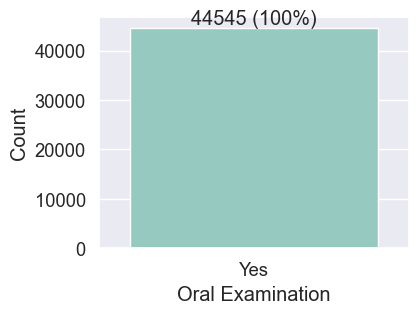

In [46]:
# Oral :

plt.rcParams["figure.figsize"]=4,3
sns.set(font_scale=1.2)

hasPoolPlot= sns.countplot(x=data['oral'],palette="Set3",order=data['oral'].value_counts(ascending=True).index)
rel_values = data['oral'].value_counts(ascending=True, normalize=True).values * 100
orderLabel = data['oral'].value_counts(ascending=True).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
hasPoolPlot.bar_label(container=hasPoolPlot.containers[0],labels=lbls)
hasPoolPlot.set(xlabel='Oral Examination', ylabel="Count")
plt.show()

# Dental Caries :

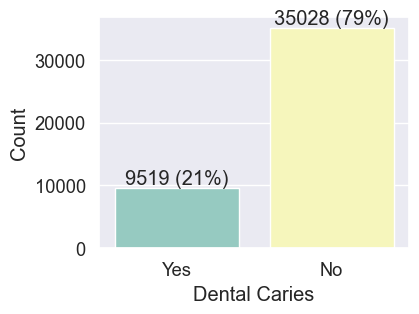

In [47]:
# Dental Caries :

plt.rcParams["figure.figsize"]=4,3
sns.set(font_scale=1.2)

hasPoolPlot= sns.countplot(x=data['dental caries'],palette="Set3",order=data['dental caries'].value_counts(ascending=True).index)
rel_values = data['dental caries'].value_counts(ascending=True, normalize=True).values * 100
orderLabel = data['dental caries'].value_counts(ascending=True).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
hasPoolPlot.bar_label(container=hasPoolPlot.containers[0],labels=lbls)
hasPoolPlot.set(xlabel='Dental Caries', ylabel="Count")
plt.show()

# Tartar

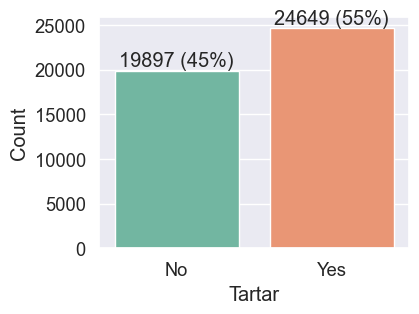

In [48]:
# Tartar :

plt.rcParams["figure.figsize"]=4,3
sns.set(font_scale=1.2)

hasYardPlot= sns.countplot(x=data['tartar'],palette="Set2",order=data['tartar'].value_counts(ascending=True).index)
rel_values = data['tartar'].value_counts(ascending=True, normalize=True).values * 100
orderLabel = data['tartar'].value_counts(ascending=True).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
hasYardPlot.bar_label(container=hasYardPlot.containers[0],labels=lbls)
hasYardPlot.set(xlabel='Tartar', ylabel='Count')

plt.show()

# Smoking - Target (Y)

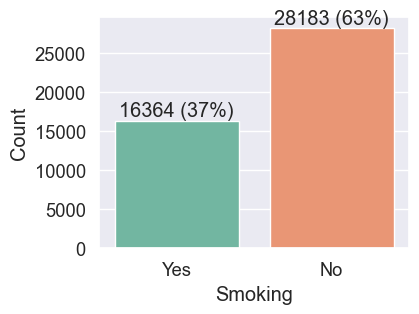

In [49]:
# Smoking :

plt.rcParams["figure.figsize"]=4,3
sns.set(font_scale=1.2)

hasYardPlot= sns.countplot(x=data['smoking'],palette="Set2",order=data['smoking'].value_counts(ascending=True).index)
rel_values = data['smoking'].value_counts(ascending=True, normalize=True).values * 100
orderLabel = data['smoking'].value_counts(ascending=True).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
hasYardPlot.bar_label(container=hasYardPlot.containers[0],labels=lbls)
hasYardPlot.set(xlabel='Smoking', ylabel='Count')

plt.show()

# HeatMap

<AxesSubplot:>

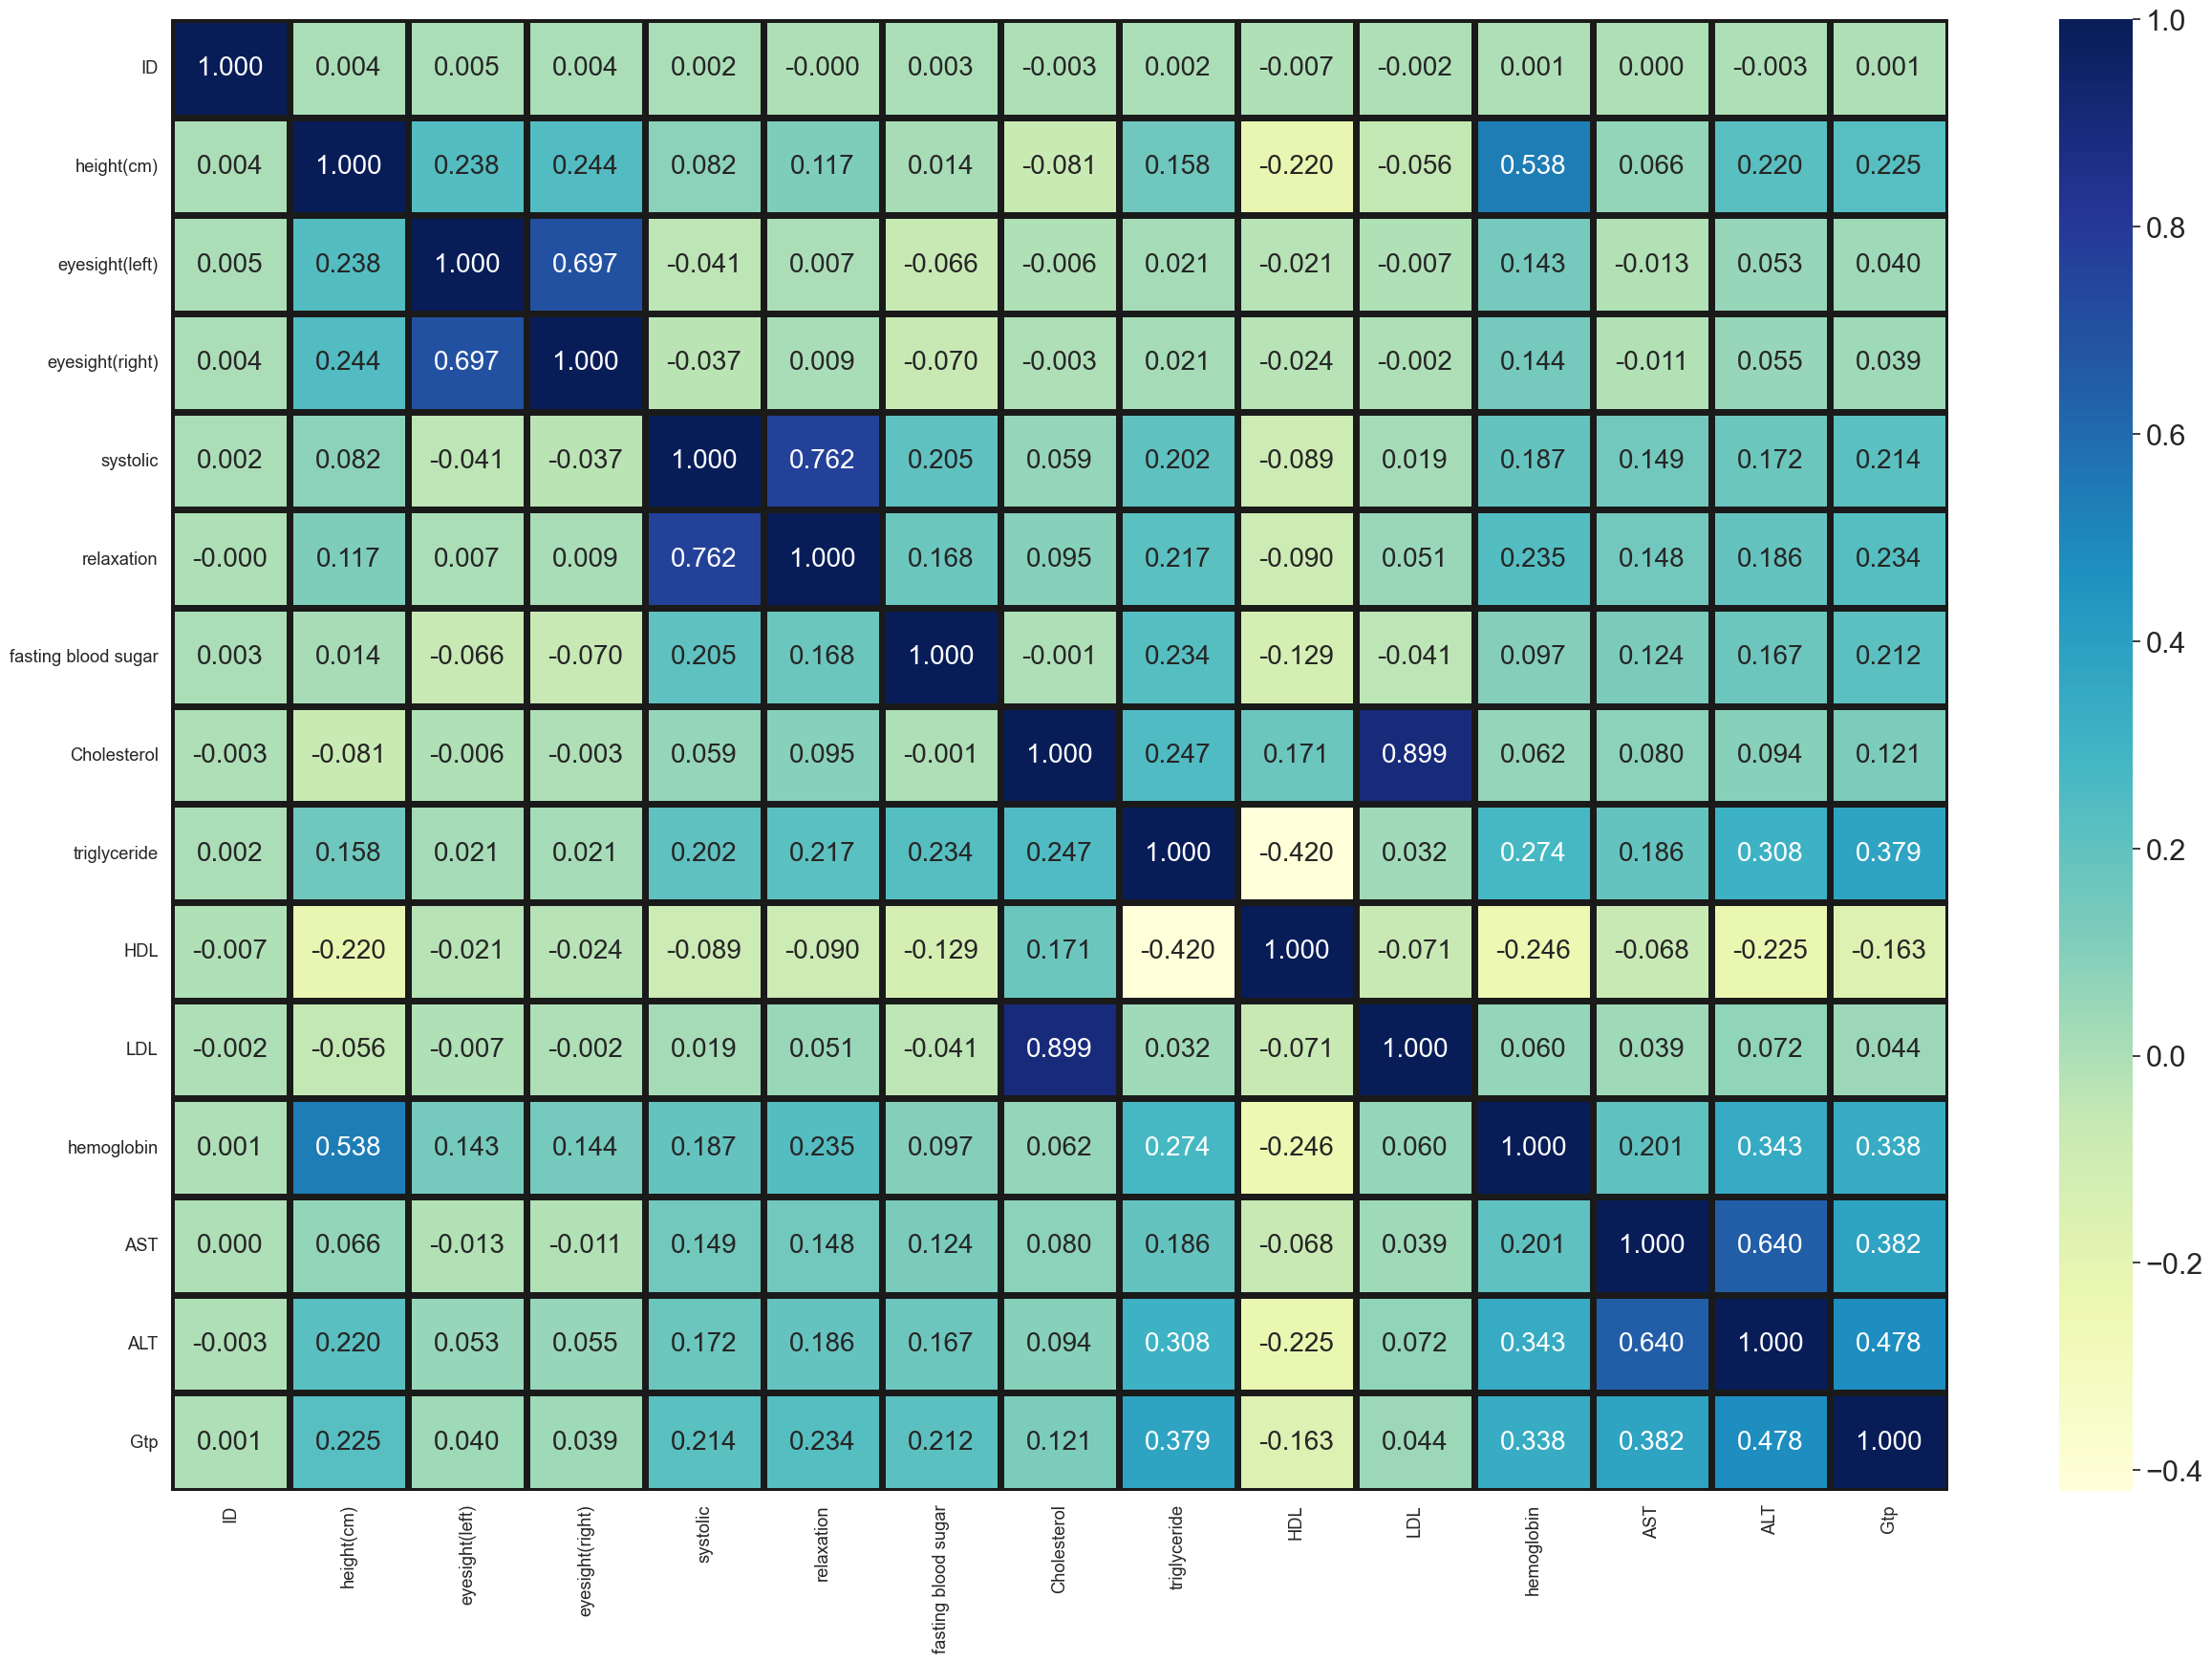

In [50]:
fig, ax = plt.subplots(figsize=(30,20))
sns.set(font_scale=2)
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu',fmt='.3f', linewidths=5,linecolor="k", annot_kws={"size":20})

#  קשרים צפויים ולא צפויים  

# LDL & Cholesterol

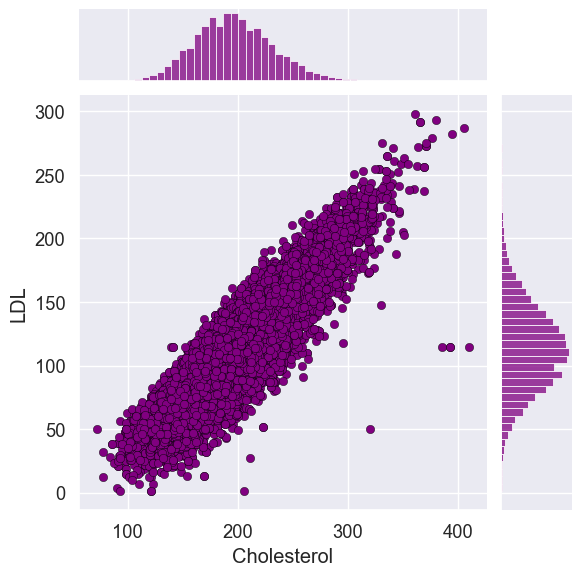

In [51]:
# LDL & Cholesterol
plt.rcParams["figure.figsize"]=8,5
sns.set(font_scale=1.2)
ass = sns.jointplot(x=data["Cholesterol"], y=data["LDL"], kind='scatter', marginal_kws=dict(bins=50, fill=True), color='purple', edgecolor="black", linewidth=0.3)


# AST & ALT

C:\Users\Lital\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


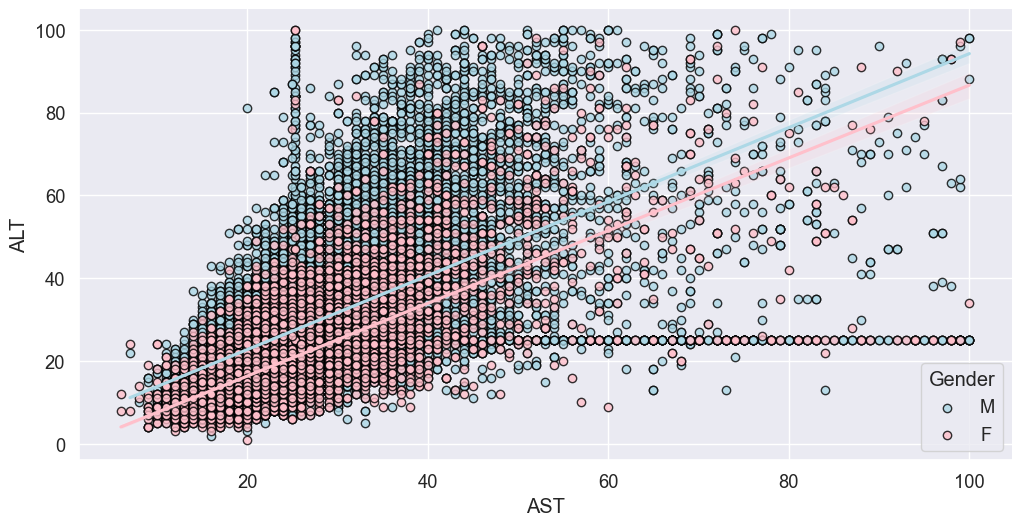

In [52]:
# AST & ALT
plt.rcParams["figure.figsize"]=5,5
sns.set(font_scale=1.2)
sns.lmplot(data = data, x = "AST" , y = "ALT", hue = "gender", height = 5.5, aspect=1.9,legend_out = False, palette=["lightblue", "pink"], scatter_kws={'edgecolor':'black'}).set(xlabel='AST', ylabel='ALT')
plt.legend(title='Gender', loc = "lower right")

# Relaxation & Systolic 

Text(30.625, 0.5, 'Relaxation')

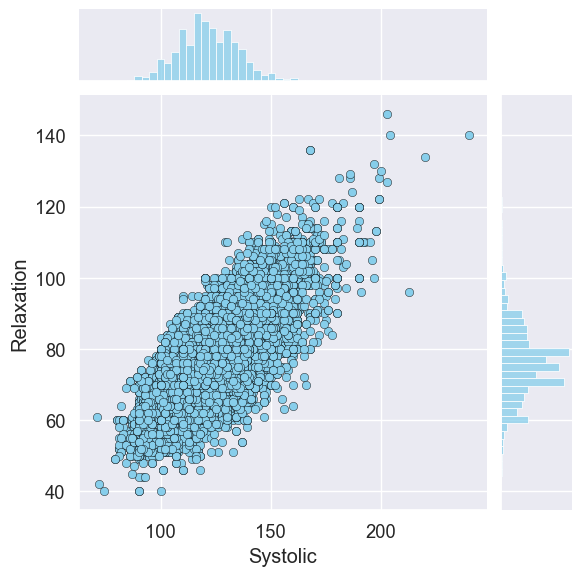

In [53]:
# Relaxation & Systolic 
plt.rcParams["figure.figsize"]=10,5
sns.set(font_scale=1.2)
ass = sns.jointplot(x=data["systolic"], y=data["relaxation"], kind='scatter', marginal_kws=dict(bins=50, fill=True),color='skyblue', edgecolor="black", linewidth=0.3)
ass.ax_joint.set_xlabel('Systolic')
ass.ax_joint.set_ylabel('Relaxation')

# HDL & LDL

# קשרים מול משתנה מטרה

# Hemoglobin & Smoking(target) by Gender.

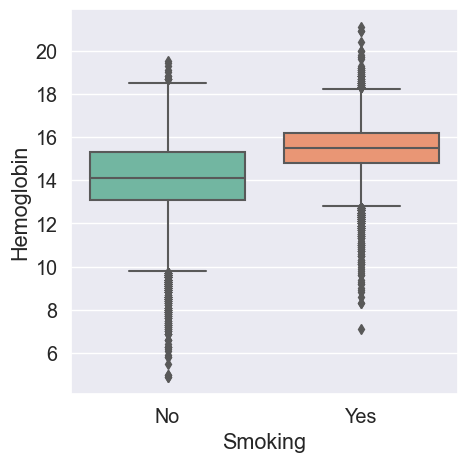

In [54]:
# Hemoglobin & Smoking(target) by Gender.

plt.rcParams["figure.figsize"]=5,5
sns.set(font_scale=1.3)
f = sns.boxplot(data = data, x = "smoking" , y = "hemoglobin", palette="Set2").set(xlabel = "Smoking" , ylabel = "Hemoglobin")
#plt.legend(title='Gender', loc='upper center')


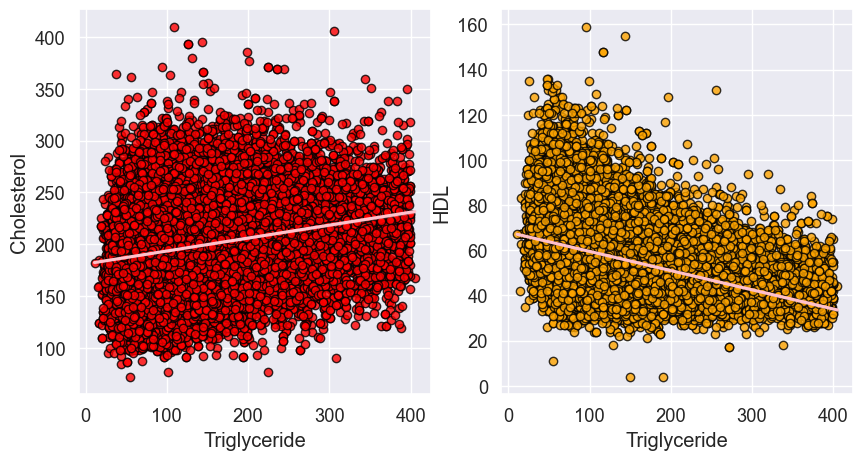

In [56]:
#UNPRIDICTABLE
#Triglyceride & HDL

plt.rcParams["figure.figsize"]=10,5
sns.set(font_scale=1.2)

fig, (ax1, ax2) = plt.subplots(ncols=2)


zx1 = sns.regplot(data=data,x="triglyceride", y="Cholesterol", scatter_kws={"color": "red",'edgecolor':'black'},
                line_kws={'color': 'pink'},ax=ax1).set(xlabel = "Triglyceride" , ylabel = "Cholesterol")


zx2 = sns.regplot(data=data, x="triglyceride", y="HDL", scatter_kws={"color": "orange",'edgecolor':'black'},
                line_kws={'color': 'pink'},ax=ax2).set(xlabel = "Triglyceride" , ylabel = "HDL")



# Height(cm) & Hemoglobin

AttributeError: module 'seaborn' has no attribute 'rcParams'

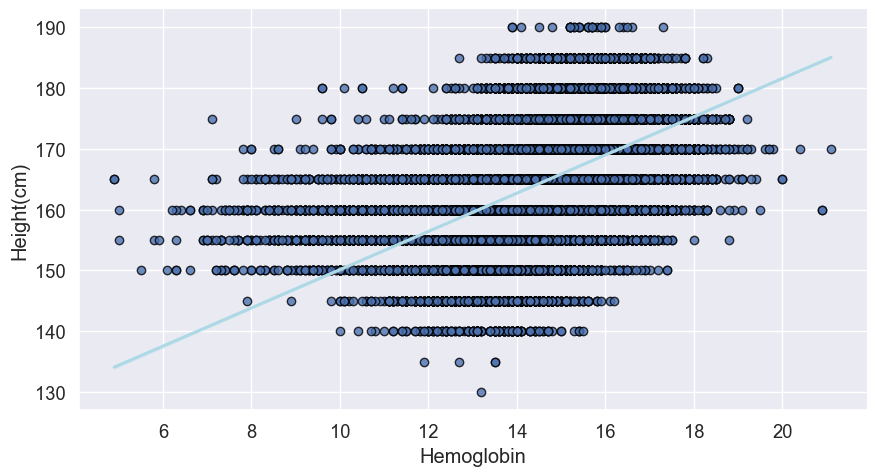

In [79]:
#UNPRIDICTABLE
# Height(cm) & Hemoglobin
plt.rcParams["figure.figsize"]=7,5
sns.set(font_scale=1.2)

sns.lmplot(data = data , x = "hemoglobin" , y = "height(cm)", height=5, aspect=1.8, 
           scatter_kws={'edgecolor':'black'}, line_kws={"color": "lightblue"}).set(xlabel = "Hemoglobin" , ylabel = "Height(cm)")
sns.rcParams["figure.figsize"]=7,5

smoking
No     115.808966
Yes    111.871044
Name: LDL, dtype: float64
smoking
No     59.289759
Yes    53.771376
Name: HDL, dtype: float64


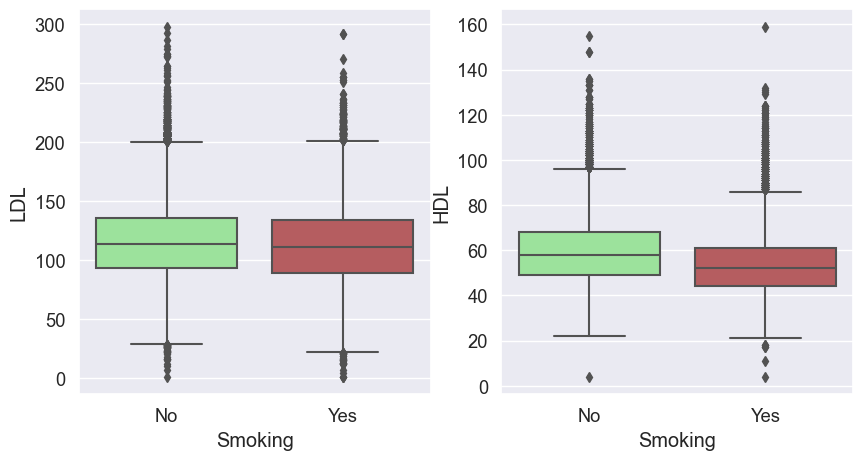

In [60]:
#Smoking & HDL, LDL

plt.rcParams["figure.figsize"]=10,5
sns.set(font_scale=1.2)

f, axes = plt.subplots(1, 2)

we1 = sns.boxplot(data = data, x = "smoking" , y = "LDL" , palette=["lightgreen", "r"],ax=axes[0]).set(xlabel = "Smoking" , ylabel = "LDL")
we2 = sns.boxplot(data = data, x = "smoking" , y = "HDL" , palette=["lightgreen", "r"] ,ax=axes[1]).set(xlabel = "Smoking" , ylabel = "HDL")

print(data.groupby('smoking').LDL.mean())
print(data.groupby('smoking').HDL.mean())

Text(0.5, 0, 'Dental Caries')

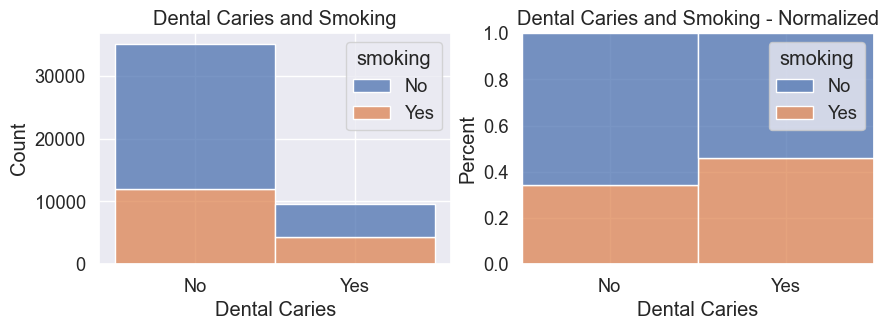

In [61]:
#Smoking & Dental caries

plt.rcParams["figure.figsize"]=10,3
sns.set(font_scale=1.2)

#temp_data = pd.DataFrame.copy(data)
f, axes = plt.subplots(1, 2)


dcs1 = sns.histplot(data = data, binwidth=0.5, x="dental caries", hue="smoking", stat="count", multiple="stack",ax=axes[0])
dcs1.set(title="Dental Caries and Smoking")
dcs1.set_xlabel("Dental Caries")

dcs2 = sns.histplot(data = data, binwidth=0.5, x="dental caries", hue="smoking", stat="percent", multiple="fill",ax=axes[1])
dcs2.set(title="Dental Caries and Smoking - Normalized")
dcs2.set_xlabel("Dental Caries")

# Preparations For Question 3

## All Binaries Values Back to (1, 0) From (Yes, No)

In [62]:
# Smoking
for index, row in data.iterrows():
    if data.at[index, 'smoking'] == 'Yes' :  
        data.at[index, 'smoking'] = 1
    if data.at[index, 'smoking'] == 'No' :  
        data.at[index, 'smoking'] = 0

# Tartar
for index, row in data.iterrows():
    if data.at[index, 'tartar'] == 'Yes' :  
        data.at[index, 'tartar'] = 1
    if data.at[index, 'tartar'] == "No" :  
        data.at[index, 'tartar'] = 0
        
# Dental Caries
for index, row in data.iterrows():
    if data.at[index, 'dental caries'] == 'Yes' :  
        data.at[index, 'dental caries'] = 1
    if data.at[index, 'dental caries'] == "No" :  
        data.at[index, 'dental caries'] = 0        


## Check For "Tartar"

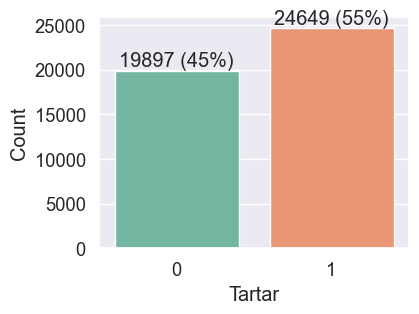

In [63]:
# Tartar :

plt.rcParams["figure.figsize"]=4,3
sns.set(font_scale=1.2)

hasYardPlot= sns.countplot(x=data['tartar'],palette="Set2",order=data['tartar'].value_counts(ascending=True).index)
rel_values = data['tartar'].value_counts(ascending=True, normalize=True).values * 100
orderLabel = data['tartar'].value_counts(ascending=True).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
hasYardPlot.bar_label(container=hasYardPlot.containers[0],labels=lbls)
hasYardPlot.set(xlabel='Tartar', ylabel='Count')

plt.show()

## Check For "Smoking"

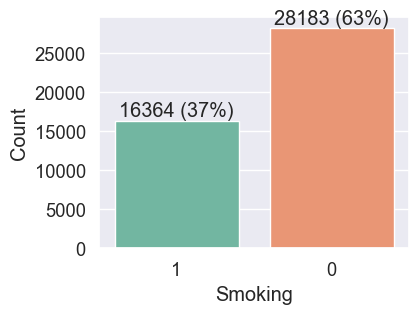

In [64]:
# Smoking :

plt.rcParams["figure.figsize"]=4,3
sns.set(font_scale=1.2)

hasYardPlot= sns.countplot(x=data['smoking'],palette="Set2",order=data['smoking'].value_counts(ascending=True).index)
rel_values = data['smoking'].value_counts(ascending=True, normalize=True).values * 100
orderLabel = data['smoking'].value_counts(ascending=True).values
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(orderLabel, rel_values)]
hasYardPlot.bar_label(container=hasYardPlot.containers[0],labels=lbls)
hasYardPlot.set(xlabel='Smoking', ylabel='Count')

plt.show()

In [65]:
# Hearing(Left)
for index, row in data.iterrows():
    if data.at[index, 'hearing(left)'] == 1 :  
        data.at[index, 'hearing(left)'] = 1
    if data.at[index, 'hearing(left)'] == 2 :  
        data.at[index, 'hearing(left)'] = 0
        
# Hearing(Right)
for index, row in data.iterrows():
    if data.at[index, 'hearing(right)'] == 1 :  
        data.at[index, 'hearing(right)'] = 1
    if data.at[index, 'hearing(right)'] == 2 :  
        data.at[index, 'hearing(right)'] = 0
        
# Oral
for index, row in data.iterrows():
    if (data.at[index, 'oral'] == "yes") or (data.at[index, 'oral'] == "12") or (data.at[index, 'oral'] == "Y"):  
        data.at[index, 'oral'] = '1'

# Tartar
for index, row in data.iterrows():
    if data.at[index, 'tartar'] == 'Y' :  
        data.at[index, 'tartar'] = 1
    if data.at[index, 'tartar'] == "N" :  
        data.at[index, 'tartar'] = 0

# Smoking
for index, row in data.iterrows():
    if data.at[index, 'smoking'] == 1 :  
        data.at[index, 'smoking'] = 1
    if data.at[index, 'smoking'] == 0 :  
        data.at[index, 'smoking'] = 0

# Fixing Null Values

In [66]:
data.isna().sum()

ID                      0
gender                  0
age                     0
height(cm)             40
weight(kg)              1
waist(cm)               0
eyesight(left)          3
eyesight(right)         7
hearing(left)           2
hearing(right)         14
systolic               17
relaxation             10
fasting blood sugar     8
Cholesterol            12
triglyceride           22
HDL                     9
LDL                     8
hemoglobin             12
Urine protein           6
serum creatinine        3
AST                     3
ALT                    22
Gtp                     0
oral                    2
dental caries           0
tartar                  1
smoking                 0
dtype: int64

# Categorials By Most Frequent Value - Mode()

In [67]:
data["age"].fillna(data["age"].mode().iloc[0], inplace = True)
data["oral"].fillna(data["oral"].mode().iloc[0], inplace = True)
data["height(cm)"].fillna(data["height(cm)"].mode().iloc[0], inplace = True)
data["weight(kg)"].fillna(data["weight(kg)"].mode().iloc[0], inplace = True)
data["waist(cm)"].fillna(data["waist(cm)"].mode().iloc[0], inplace = True)
data["eyesight(left)"].fillna(data["eyesight(left)"].mode().iloc[0], inplace = True)
data["eyesight(right)"].fillna(data["eyesight(right)"].mode().iloc[0], inplace = True)
data["hearing(left)"].fillna(data["hearing(left)"].mode().iloc[0], inplace = True)
data["hearing(right)"].fillna(data["hearing(right)"].mode().iloc[0], inplace = True)
data["Urine protein"].fillna(data["Urine protein"].mode().iloc[0], inplace = True)
data["tartar"].fillna(data["tartar"].mode().iloc[0], inplace = True)
data["serum creatinine"].fillna(data["serum creatinine"].mode().iloc[0], inplace = True)

# Non- Categorials By Mean()

In [68]:
data["systolic"].fillna(data["systolic"].mean(), inplace = True)
data["relaxation"].fillna(data["relaxation"].mean(), inplace = True)
data["HDL"].fillna(data["HDL"].mean(), inplace = True)
data["ALT"].fillna(data["ALT"].mean(), inplace = True)
data["AST"].fillna(data["AST"].mean(), inplace = True)
data["hemoglobin"].fillna(data["hemoglobin"].mean(), inplace = True)
data["LDL"].fillna(data["LDL"].mean(), inplace = True)
data["HDL"].fillna(data["HDL"].mean(), inplace = True)
data["triglyceride"].fillna(data["triglyceride"].mean(), inplace = True)
data["Cholesterol"].fillna(data["Cholesterol"].mean(), inplace = True)
data["fasting blood sugar"].fillna(data["fasting blood sugar"].mean(), inplace = True)

In [69]:
data.isna().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

# New Variables

# BMI

In [71]:
#BMI

df["height(cm)"].fillna(df["height(cm)"].mode().iloc[0], inplace = True)
df["weight(kg)"].fillna(df["weight(kg)"].mode().iloc[0], inplace = True)

data['BMI'] = 0
data['BMI'] = df['weight(kg)']/ ((df['height(cm)']/100)**2)
data['BMI']

0        22.491349
1        25.951557
2        27.343750
3        27.777778
4        26.666667
           ...    
44548    23.437500
44549    23.148148
44550    19.591837
44551    25.390625
44552    17.777778
Name: BMI, Length: 44547, dtype: float64

# Blood Pressure

In [73]:
#Blood_Pressure

data["Blood_Pressure"] = 0

data.loc[((data["systolic"] < 120) & (data["relaxation"] < 80)), "Blood_Pressure"] = "Optimal"
data.loc[((data["systolic"] >= 120) & (data["systolic"] <= 129)) | ((data["relaxation"] >= 80) & (data["relaxation"] <= 84)) , "Blood_Pressure"] = "Normal"
data.loc[((data["systolic"] >= 130) & (data["systolic"] <= 139)) | ((data["relaxation"] >= 85) & (data["relaxation"] <= 89)) , "Blood_Pressure"] = "Normal High"
data.loc[(data["systolic"] > 139) | (data["relaxation"] > 89) , "Blood_Pressure"] = "High"

data["Blood_Pressure"]

0               High
1        Normal High
2               High
3             Normal
4             Normal
            ...     
44548           High
44549    Normal High
44550        Optimal
44551           High
44552        Optimal
Name: Blood_Pressure, Length: 44547, dtype: object

# Drop Column

In [74]:
data.drop(columns="ID", inplace=True,errors="ignore")
data.drop(columns="eyesight(left)", inplace=True,errors="ignore")
data.drop(columns="eyesight(right)", inplace=True,errors="ignore")
data.drop(columns="hearing(left)", inplace=True,errors="ignore")
data.drop(columns="hearing(right)", inplace=True,errors="ignore")
data.drop(columns="serum creatinine", inplace=True,errors="ignore")
data.drop(columns="oral", inplace=True,errors="ignore")
data.drop(columns="Urine protein", inplace=True,errors="ignore")
data.drop(columns="waist(cm)", inplace=True,errors="ignore")

In [75]:
data

gender    age  height(cm) weight(kg)  systolic  relaxation  \
0          M  40-55       170.0      55-70     140.0       100.0   
1          M  40-55       170.0     71-100     138.0        88.0   
2          M  55-70       160.0      55-70     143.0        76.0   
3          M  30-40       180.0     71-100     120.0        78.0   
4          F  40-55       150.0      55-70     128.0        81.0   
...      ...    ...         ...        ...       ...         ...   
44548      M  30-40       160.0      55-70     151.0       102.0   
44549      M  30-40       180.0     71-100     132.0        86.0   
44550      M  25-30       175.0      55-70      99.0        50.0   
44551      M  40-55       160.0      55-70     153.0        98.0   
44552      F  30-40       150.0   Under 40     101.0        65.0   

       fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  \
0                     96.0        222.0         212.0  40.0  140.0   
1                     92.0        257.0         285.0  52.0  148.0   
2                    128.0        174.0         120.0  51.0   99.0   
3                     94.0        213.0         264.0  52.0  108.0   
4                    106.0        180.0          94.0  78.0   91.0   
...                    ...          ...           ...   ...    ...   
44548                100.0        206.0          97.0  64.0  122.0   
44549                 95.0        203.0         209.0  42.0  119.0   
44550                 91.0        162.0          64.0  54.0   95.0   
44551                 99.0        280.0         336.0  53.0  160.0   
44552                 94.0        235.0          62.0  62.0  160.0   

       hemoglobin   AST   ALT   Gtp dental caries  tartar smoking        BMI  \
0            15.4  41.0  68.0  34.0             0       1       0  22.491349   
1            15.2  38.0  45.0  67.0             0       1       1  25.951557   
2            15.8  22.0  24.0  43.0             0       1       1  27.343750   
3            16.1  16.0  31.0  89.0             0       0       1  27.777778   
4            14.0  23.0  19.0  16.0             0       0       1  26.666667   
...           ...   ...   ...   ...           ...     ...     ...        ...   
44548        14.0  20.0  17.0  15.0             0       0       1  23.437500   
44549        15.9  19.0  21.0  18.0             0       1       0  23.148148   
44550        15.6  18.0  13.0  18.0             1       1       1  19.591837   
44551        15.9  37.0  48.0  96.0             1       1       1  25.390625   
44552        14.0  16.0  15.0  16.0             0       1       0  17.777778   

      Blood_Pressure  
0               High  
1        Normal High  
2               High  
3             Normal  
4             Normal  
...              ...  
44548           High  
44549    Normal High  
44550        Optimal  
44551           High  
44552        Optimal  

[44547 rows x 20 columns]

# Heat Map - Raw Data

<AxesSubplot:>

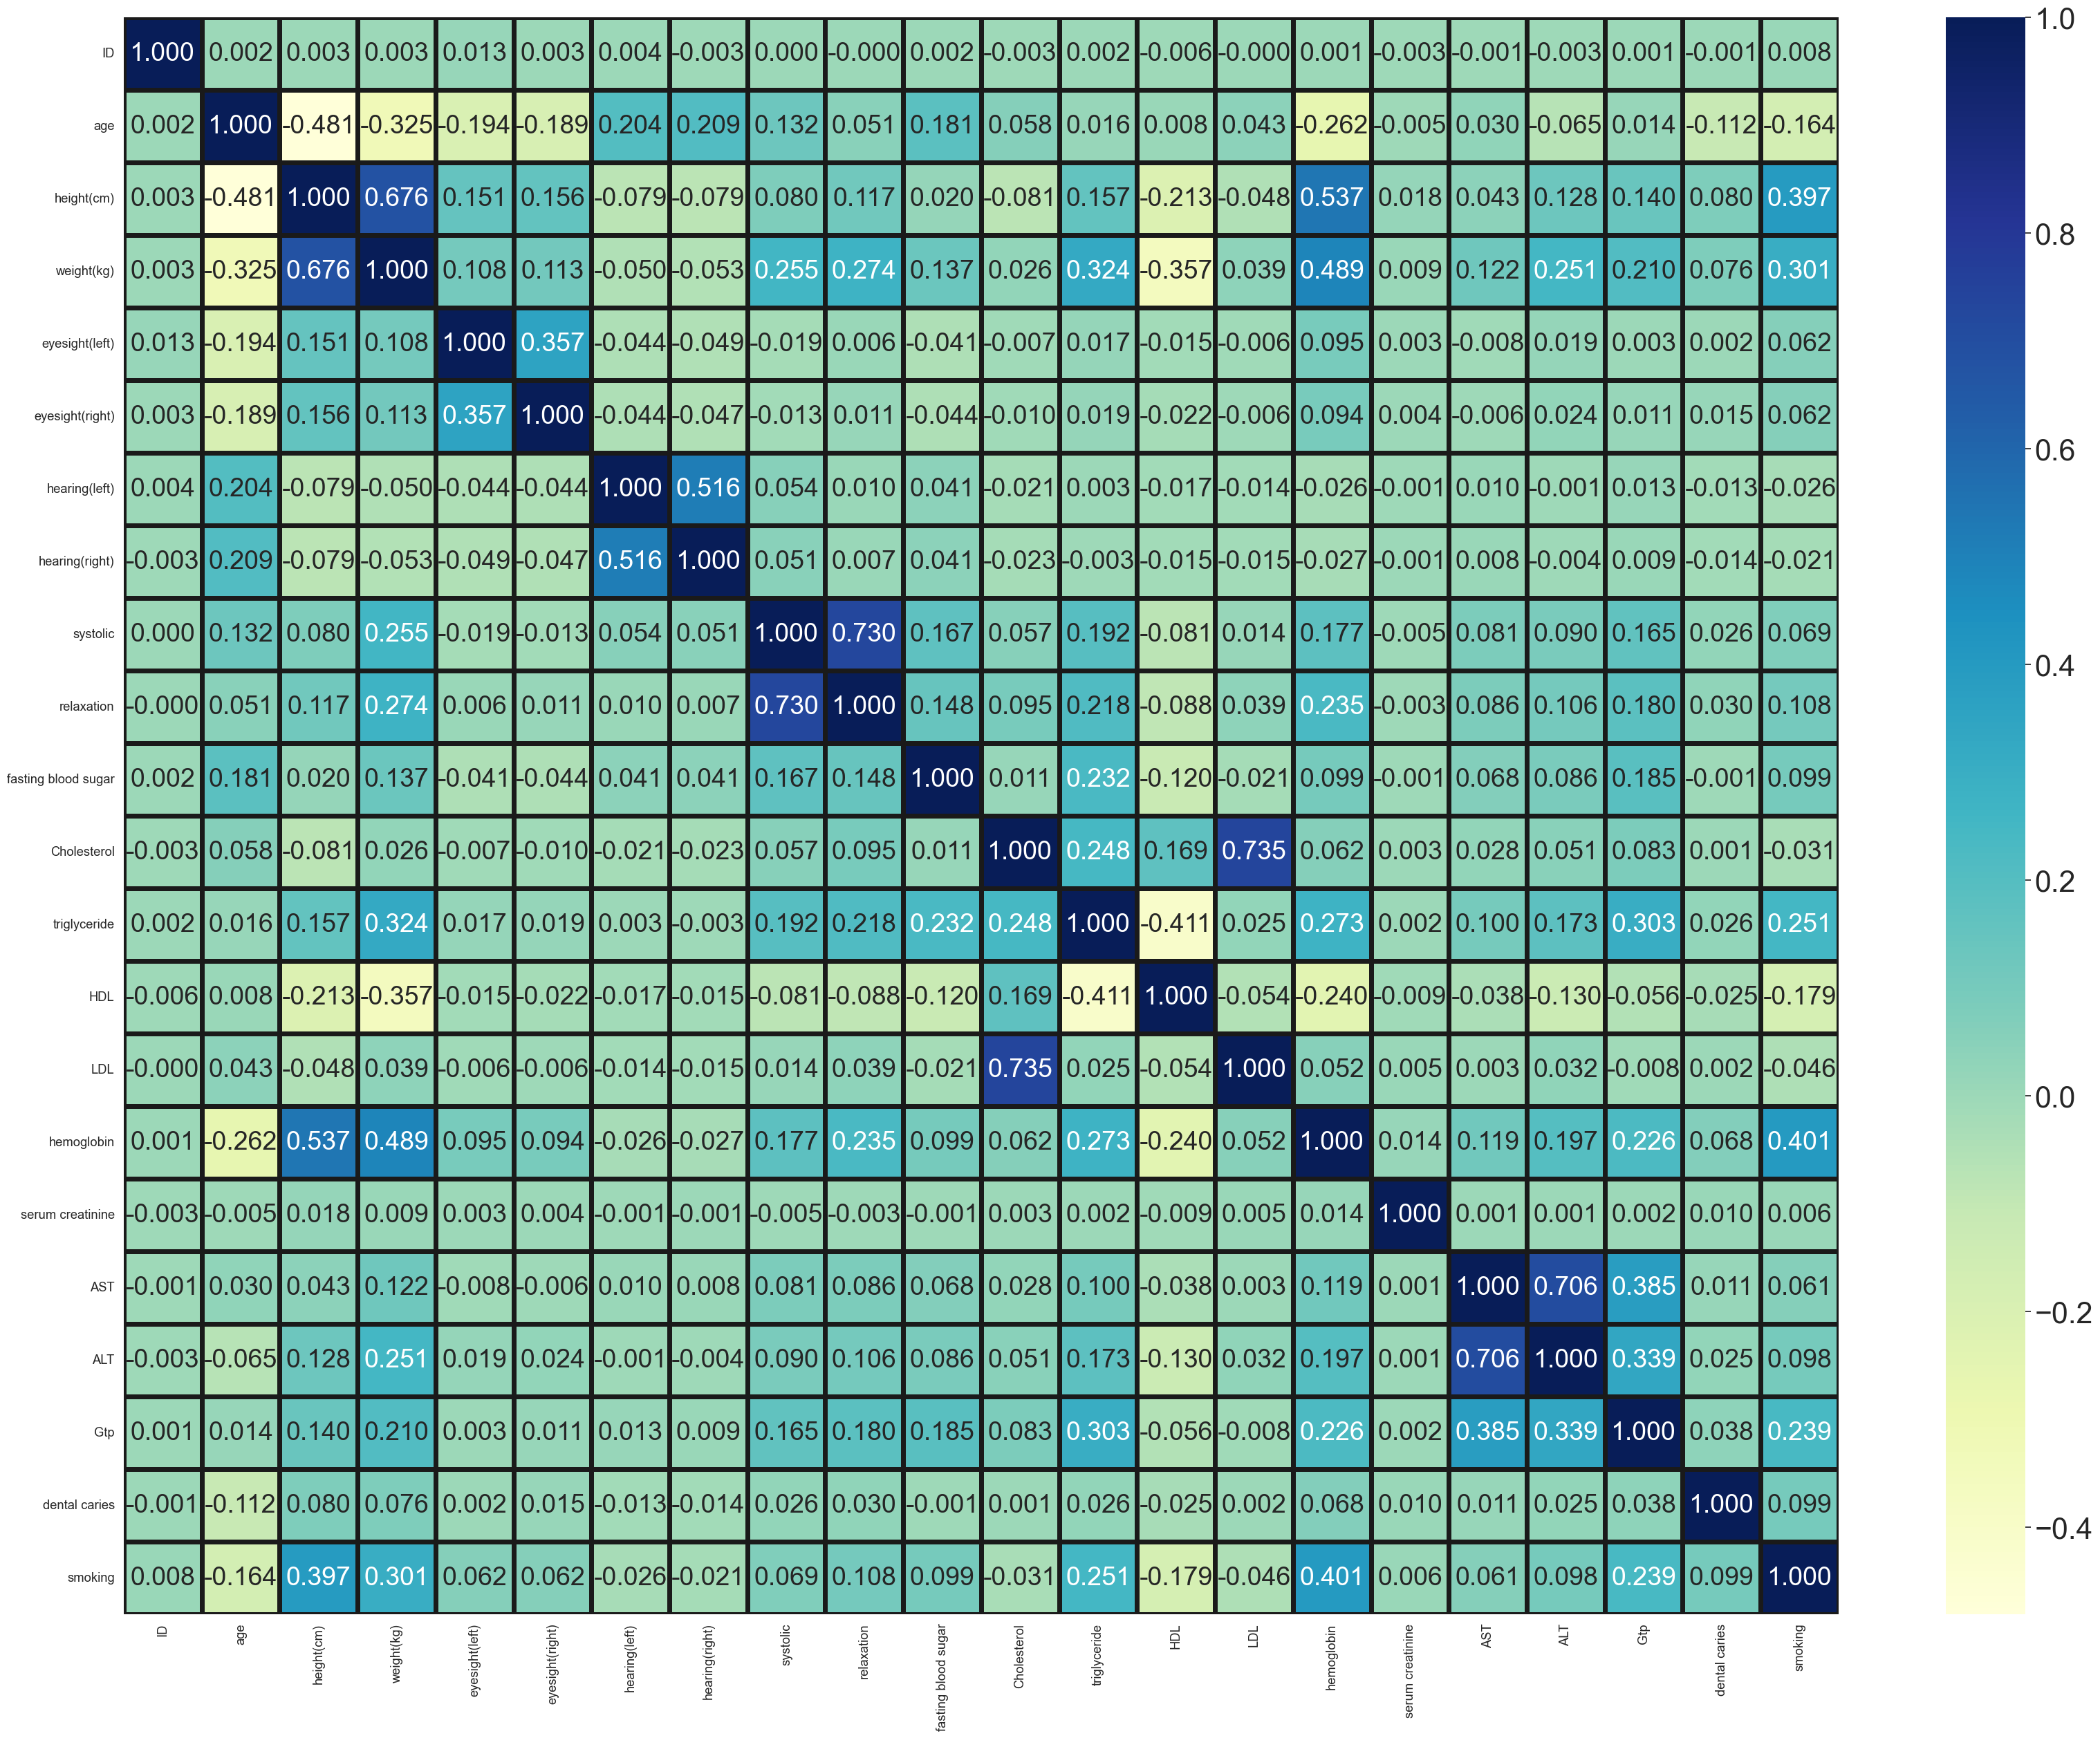

In [76]:
fig, ax = plt.subplots(figsize=(40,30))
sns.set(font_scale=2.8)
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu',fmt='.3f', linewidths=5,linecolor="k", annot_kws={"size":27})

# Heat Map - New Fix Data

In [77]:
data["smoking"] = df["smoking"]

<AxesSubplot:>

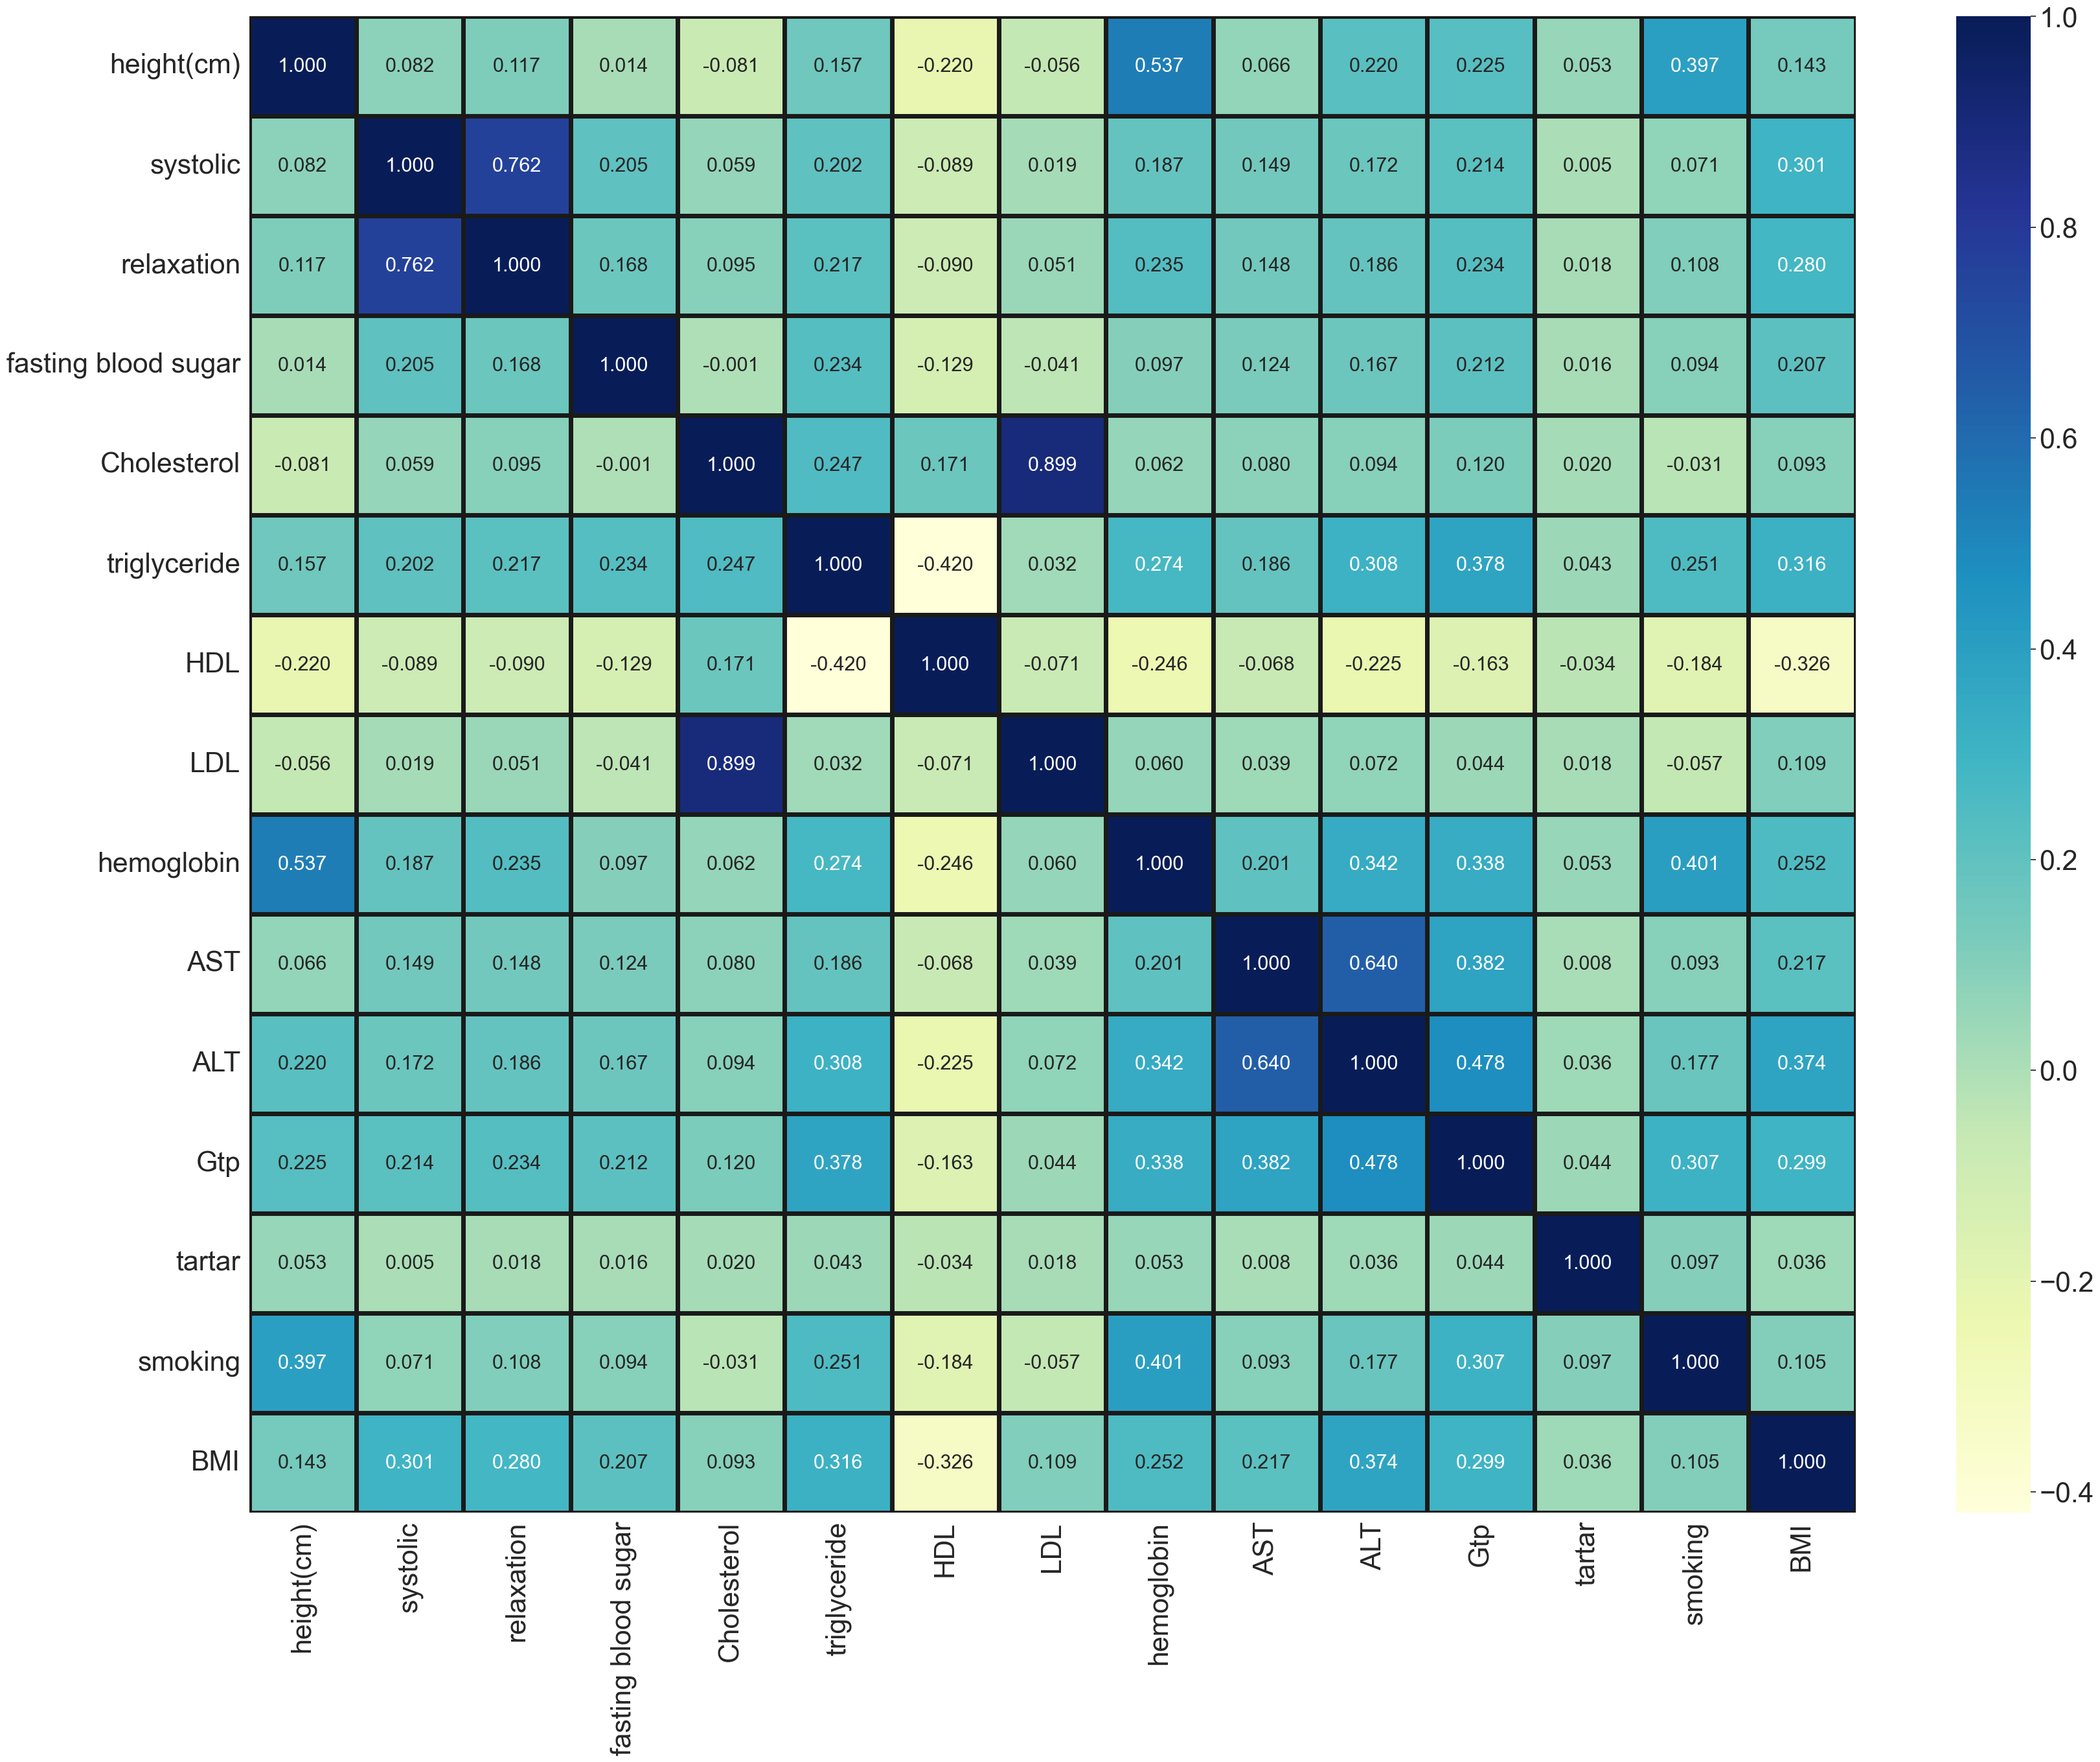

In [78]:
fig, ax = plt.subplots(figsize=(40,30))
sns.set(font_scale=2.8)
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu',fmt='.3f', linewidths=5,linecolor="k", annot_kws={"size":22})